# 🛍️ Comprehensive Online Shopping Behavior Analysis & ML Pipeline

## 📋 Table of Contents
1. [Data Loading & Initial Exploration](#data-loading)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Data Preprocessing](#preprocessing)
4. [Feature Engineering & Analysis](#feature-engineering)
5. [Model Training & Evaluation](#model-training)
6. [Results Analysis & Visualization](#results-analysis)
7. [Business Insights & Recommendations](#insights)

---

## 🎯 Project Overview

This comprehensive analysis explores online shopping behavior patterns and builds machine learning models to predict subscription status. We'll use multiple algorithms to find the best predictor and provide actionable business insights.

**Key Objectives:**
- 📊 Understand customer shopping patterns
- 🔍 Identify factors influencing subscription decisions
- 🤖 Build and compare multiple ML models
- 📈 Provide data-driven business recommendations

In [14]:
# ================================
# 🔧 SETUP & IMPORTS
# ================================

# Install necessary packages
# !pip install -q imbalanced-learn xgboost lightgbm catboost plotly seaborn

# ------------------------
# 1️⃣ IMPORT LIBRARIES
# ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (make_scorer, accuracy_score, f1_score, classification_report,
                           confusion_matrix, roc_curve, auc, precision_recall_curve)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ All libraries imported successfully!")
print("🚀 Ready to start the analysis!")

✅ All libraries imported successfully!
🚀 Ready to start the analysis!


In [15]:
# ================================
# 📂 DATA LOADING & INITIAL INSPECTION
# ================================

# Load the dataset (adjust path as needed)
try:
    # For local file
    data = pd.read_csv('shopping_behavior_updated.csv')
    print("✅ Dataset loaded successfully from local file!")
except FileNotFoundError:
    print("❌ File not found. Please ensure 'shopping_behavior_updated.csv' is in the working directory")
    # Alternative: Upload file (uncomment for Google Colab)
    # from google.colab import files
    # uploaded = files.upload()
    # file_name = list(uploaded.keys())[0]
    # data = pd.read_csv(file_name)

# Display basic information
print(f"\n📊 Dataset Overview:")
print(f"📏 Shape: {data.shape}")
print(f"📋 Columns: {len(data.columns)}")
print(f"💾 Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🔍 First 5 rows:")
data.head()

✅ Dataset loaded successfully from local file!

📊 Dataset Overview:
📏 Shape: (3900, 18)
📋 Columns: 18
💾 Memory usage: 3.19 MB

🔍 First 5 rows:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [16]:
# ================================
# 🔍 DATA QUALITY ASSESSMENT
# ================================

print("📊 DATASET INFORMATION")
print("=" * 50)
print(f"Dataset shape: {data.shape}")
print(f"Number of features: {data.shape[1]}")
print(f"Number of samples: {data.shape[0]}")

print("\n📋 COLUMN DETAILS")
print("=" * 50)
print(data.info())

print("\n🔢 NUMERICAL FEATURES SUMMARY")
print("=" * 50)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print(data[numerical_cols].describe())

print("\n📝 CATEGORICAL FEATURES SUMMARY")
print("=" * 50)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
for col in categorical_cols:
    print(f"\n{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts().head())

print("\n❌ MISSING VALUES CHECK")
print("=" * 50)
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Count', ascending=False)

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print("⚠️ Missing values detected:")
    print(missing_df[missing_df['Missing Count'] > 0])

print("\n🔄 DUPLICATE ROWS CHECK")
print("=" * 50)
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(data))*100:.2f}%")
else:
    print("✅ No duplicate rows found!")

📊 DATASET INFORMATION
Dataset shape: (3900, 18)
Number of features: 18
Number of samples: 3900

📋 COLUMN DETAILS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-

🎯 TARGET VARIABLE ANALYSIS: Subscription Status
Class Distribution:
  No: 2847 (73.0%)
  Yes: 1053 (27.0%)


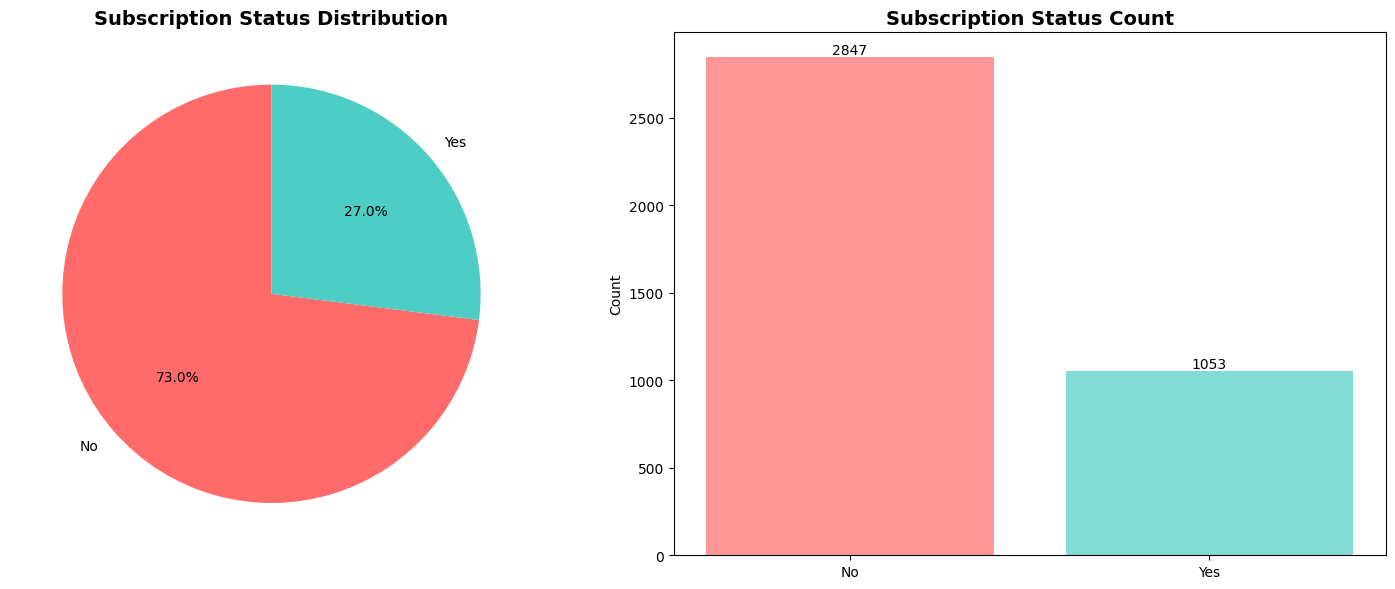

In [17]:
# ================================
# 📊 EXPLORATORY DATA ANALYSIS (EDA)
# ================================

# Target variable analysis
target_column = "Subscription Status"
print(f"🎯 TARGET VARIABLE ANALYSIS: {target_column}")
print("=" * 60)

if target_column in data.columns:
    target_counts = data[target_column].value_counts()
    target_props = data[target_column].value_counts(normalize=True) * 100

    print("Class Distribution:")
    for class_name, count in target_counts.items():
        prop = target_props[class_name]
        print(f"  {class_name}: {count} ({prop:.1f}%)")

    # Visualization 1: Target Distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Pie chart
    colors = ['#FF6B6B', '#4ECDC4']
    ax1.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax1.set_title('Subscription Status Distribution', fontsize=14, fontweight='bold')

    # Bar chart
    bars = ax2.bar(target_counts.index, target_counts.values, color=colors, alpha=0.7)
    ax2.set_title('Subscription Status Count', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Count')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

else:
    print(f"❌ Target column '{target_column}' not found in dataset!")
    print(f"Available columns: {list(data.columns)}")

👥 CUSTOMER DEMOGRAPHICS ANALYSIS


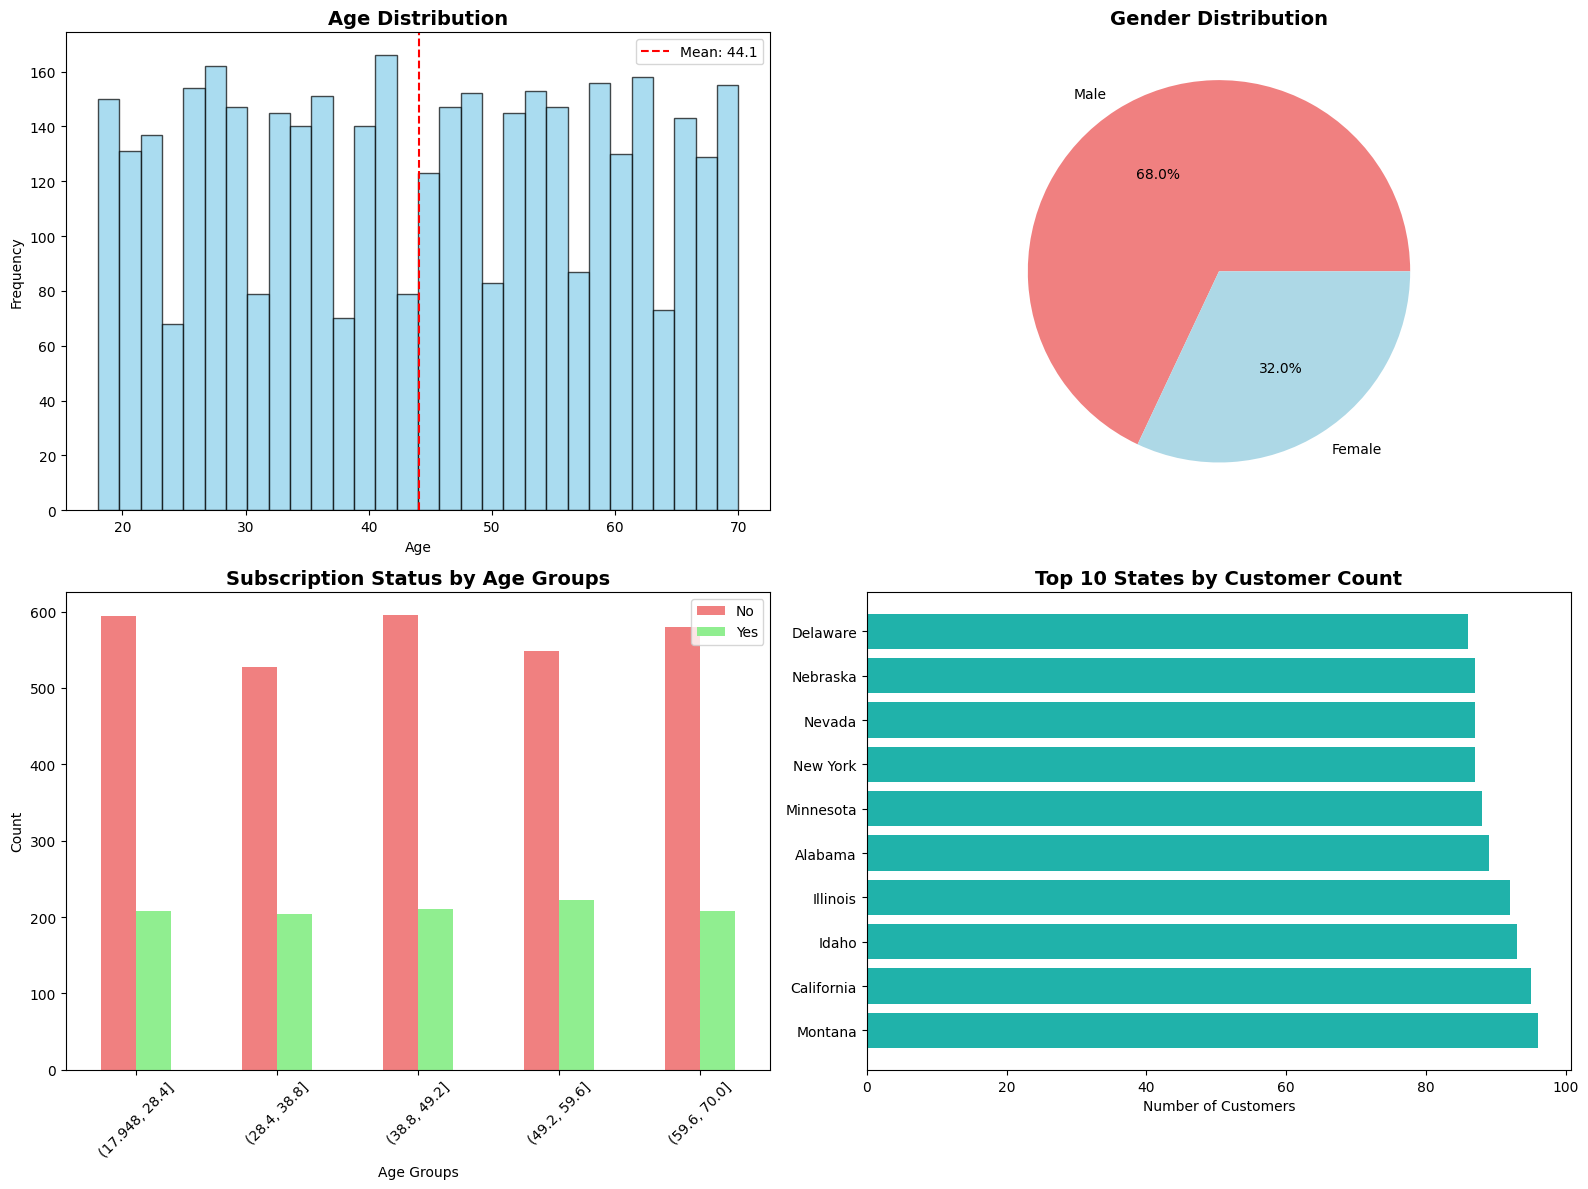


📊 Age Statistics:
  Mean age: 44.1 years
  Median age: 44.0 years
  Age range: 18 - 70 years
  Standard deviation: 15.2 years

🌍 Geographic Distribution:
  Total states represented: 50
  Most popular state: Montana (96 customers)

👫 Gender Split:
  Male: 68.0%
  Female: 32.0%


In [18]:
# ================================
# 👥 DEMOGRAPHIC ANALYSIS
# ================================

print("👥 CUSTOMER DEMOGRAPHICS ANALYSIS")
print("=" * 50)

# Age analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
axes[0,0].hist(data['Age'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(data['Age'].mean(), color='red', linestyle='--', label=f'Mean: {data["Age"].mean():.1f}')
axes[0,0].legend()

# Gender distribution
gender_counts = data['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
              colors=['lightcoral', 'lightblue'])
axes[0,1].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# Age vs Subscription Status
subscription_by_age = data.groupby(['Age', 'Subscription Status']).size().unstack(fill_value=0)
age_bins = pd.cut(data['Age'], bins=5)
age_subscription = data.groupby([age_bins, 'Subscription Status']).size().unstack(fill_value=0)
age_subscription.plot(kind='bar', ax=axes[1,0], color=['lightcoral', 'lightgreen'])
axes[1,0].set_title('Subscription Status by Age Groups', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Age Groups')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['No', 'Yes'])

# Location analysis - Top 10 states
location_counts = data['Location'].value_counts().head(10)
axes[1,1].barh(range(len(location_counts)), location_counts.values, color='lightseagreen')
axes[1,1].set_yticks(range(len(location_counts)))
axes[1,1].set_yticklabels(location_counts.index)
axes[1,1].set_title('Top 10 States by Customer Count', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Customers')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📊 Age Statistics:")
print(f"  Mean age: {data['Age'].mean():.1f} years")
print(f"  Median age: {data['Age'].median():.1f} years")
print(f"  Age range: {data['Age'].min()} - {data['Age'].max()} years")
print(f"  Standard deviation: {data['Age'].std():.1f} years")

print(f"\n🌍 Geographic Distribution:")
print(f"  Total states represented: {data['Location'].nunique()}")
print(f"  Most popular state: {data['Location'].mode().iloc[0]} ({data['Location'].value_counts().iloc[0]} customers)")

print(f"\n👫 Gender Split:")
gender_pct = data['Gender'].value_counts(normalize=True) * 100
for gender, pct in gender_pct.items():
    print(f"  {gender}: {pct:.1f}%")

🛒 SHOPPING PATTERNS & BEHAVIOR ANALYSIS


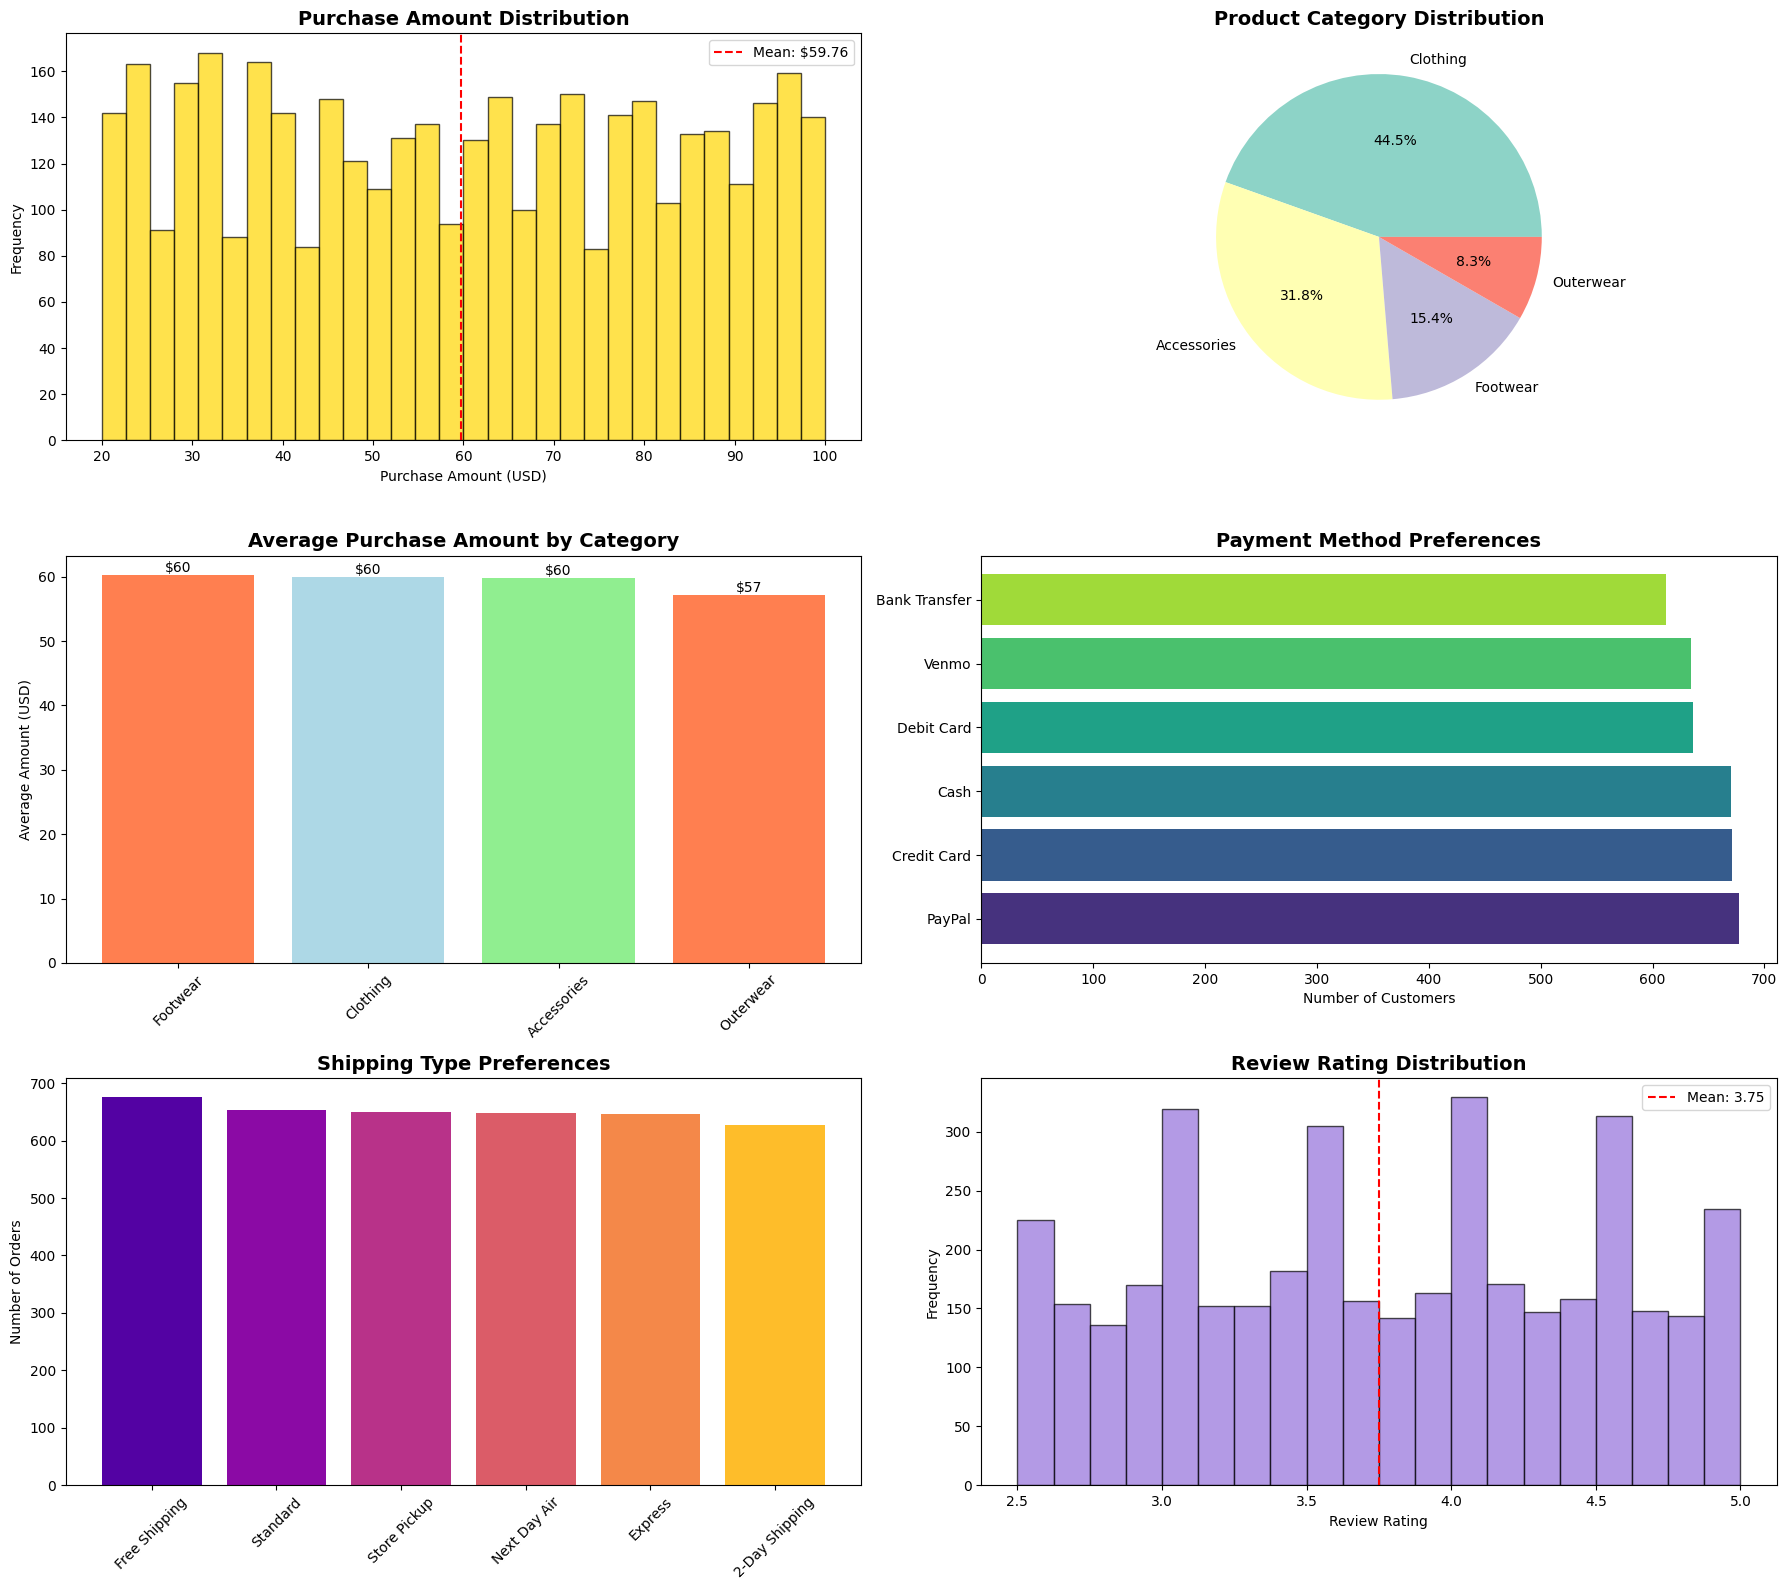


💰 PURCHASE BEHAVIOR INSIGHTS:
  Average purchase amount: $59.76
  Median purchase amount: $60.00
  Purchase range: $20 - $100
  Most expensive category: Footwear ($60.26 avg)

⭐ CUSTOMER SATISFACTION:
  Average rating: 3.75/5.0
  Rating standard deviation: 0.72
  Percentage of ratings ≥ 4.0: 42.2%

🚚 SHIPPING PREFERENCES:
  Most popular shipping: Free Shipping (17.3%)

💳 PAYMENT PREFERENCES:
  Most popular payment method: PayPal (17.4%)


In [19]:
# ================================
# 🛒 SHOPPING BEHAVIOR ANALYSIS
# ================================

print("🛒 SHOPPING PATTERNS & BEHAVIOR ANALYSIS")
print("=" * 50)

# Create comprehensive shopping behavior visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Purchase Amount Distribution
axes[0,0].hist(data['Purchase Amount (USD)'], bins=30, color='gold', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Purchase Amount Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Purchase Amount (USD)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(data['Purchase Amount (USD)'].mean(), color='red', linestyle='--',
                  label=f'Mean: ${data["Purchase Amount (USD)"].mean():.2f}')
axes[0,0].legend()

# Category Analysis
category_counts = data['Category'].value_counts()
axes[0,1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
              colors=plt.cm.Set3.colors)
axes[0,1].set_title('Product Category Distribution', fontsize=14, fontweight='bold')

# Purchase Amount by Category
category_avg = data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
bars = axes[1,0].bar(range(len(category_avg)), category_avg.values,
                     color=['coral', 'lightblue', 'lightgreen'])
axes[1,0].set_xticks(range(len(category_avg)))
axes[1,0].set_xticklabels(category_avg.index, rotation=45)
axes[1,0].set_title('Average Purchase Amount by Category', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Average Amount (USD)')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height,
                   f'${height:.0f}', ha='center', va='bottom')

# Payment Method Analysis
payment_counts = data['Payment Method'].value_counts()
axes[1,1].barh(range(len(payment_counts)), payment_counts.values,
               color=sns.color_palette("viridis", len(payment_counts)))
axes[1,1].set_yticks(range(len(payment_counts)))
axes[1,1].set_yticklabels(payment_counts.index)
axes[1,1].set_title('Payment Method Preferences', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Customers')

# Shipping Type Preferences
shipping_counts = data['Shipping Type'].value_counts()
axes[2,0].bar(range(len(shipping_counts)), shipping_counts.values,
              color=sns.color_palette("plasma", len(shipping_counts)))
axes[2,0].set_xticks(range(len(shipping_counts)))
axes[2,0].set_xticklabels(shipping_counts.index, rotation=45)
axes[2,0].set_title('Shipping Type Preferences', fontsize=14, fontweight='bold')
axes[2,0].set_ylabel('Number of Orders')

# Review Rating Distribution
axes[2,1].hist(data['Review Rating'], bins=20, color='mediumpurple', alpha=0.7, edgecolor='black')
axes[2,1].set_title('Review Rating Distribution', fontsize=14, fontweight='bold')
axes[2,1].set_xlabel('Review Rating')
axes[2,1].set_ylabel('Frequency')
axes[2,1].axvline(data['Review Rating'].mean(), color='red', linestyle='--',
                  label=f'Mean: {data["Review Rating"].mean():.2f}')
axes[2,1].legend()

plt.tight_layout()
plt.show()

# Print behavioral insights
print(f"\n💰 PURCHASE BEHAVIOR INSIGHTS:")
print(f"  Average purchase amount: ${data['Purchase Amount (USD)'].mean():.2f}")
print(f"  Median purchase amount: ${data['Purchase Amount (USD)'].median():.2f}")
print(f"  Purchase range: ${data['Purchase Amount (USD)'].min()} - ${data['Purchase Amount (USD)'].max()}")
print(f"  Most expensive category: {category_avg.index[0]} (${category_avg.iloc[0]:.2f} avg)")

print(f"\n⭐ CUSTOMER SATISFACTION:")
print(f"  Average rating: {data['Review Rating'].mean():.2f}/5.0")
print(f"  Rating standard deviation: {data['Review Rating'].std():.2f}")
print(f"  Percentage of ratings ≥ 4.0: {(data['Review Rating'] >= 4.0).mean() * 100:.1f}%")

print(f"\n🚚 SHIPPING PREFERENCES:")
most_popular_shipping = data['Shipping Type'].mode().iloc[0]
shipping_pct = (data['Shipping Type'] == most_popular_shipping).mean() * 100
print(f"  Most popular shipping: {most_popular_shipping} ({shipping_pct:.1f}%)")

print(f"\n💳 PAYMENT PREFERENCES:")
most_popular_payment = data['Payment Method'].mode().iloc[0]
payment_pct = (data['Payment Method'] == most_popular_payment).mean() * 100
print(f"  Most popular payment method: {most_popular_payment} ({payment_pct:.1f}%)")

🔗 ANALYZING FEATURE RELATIONSHIPS


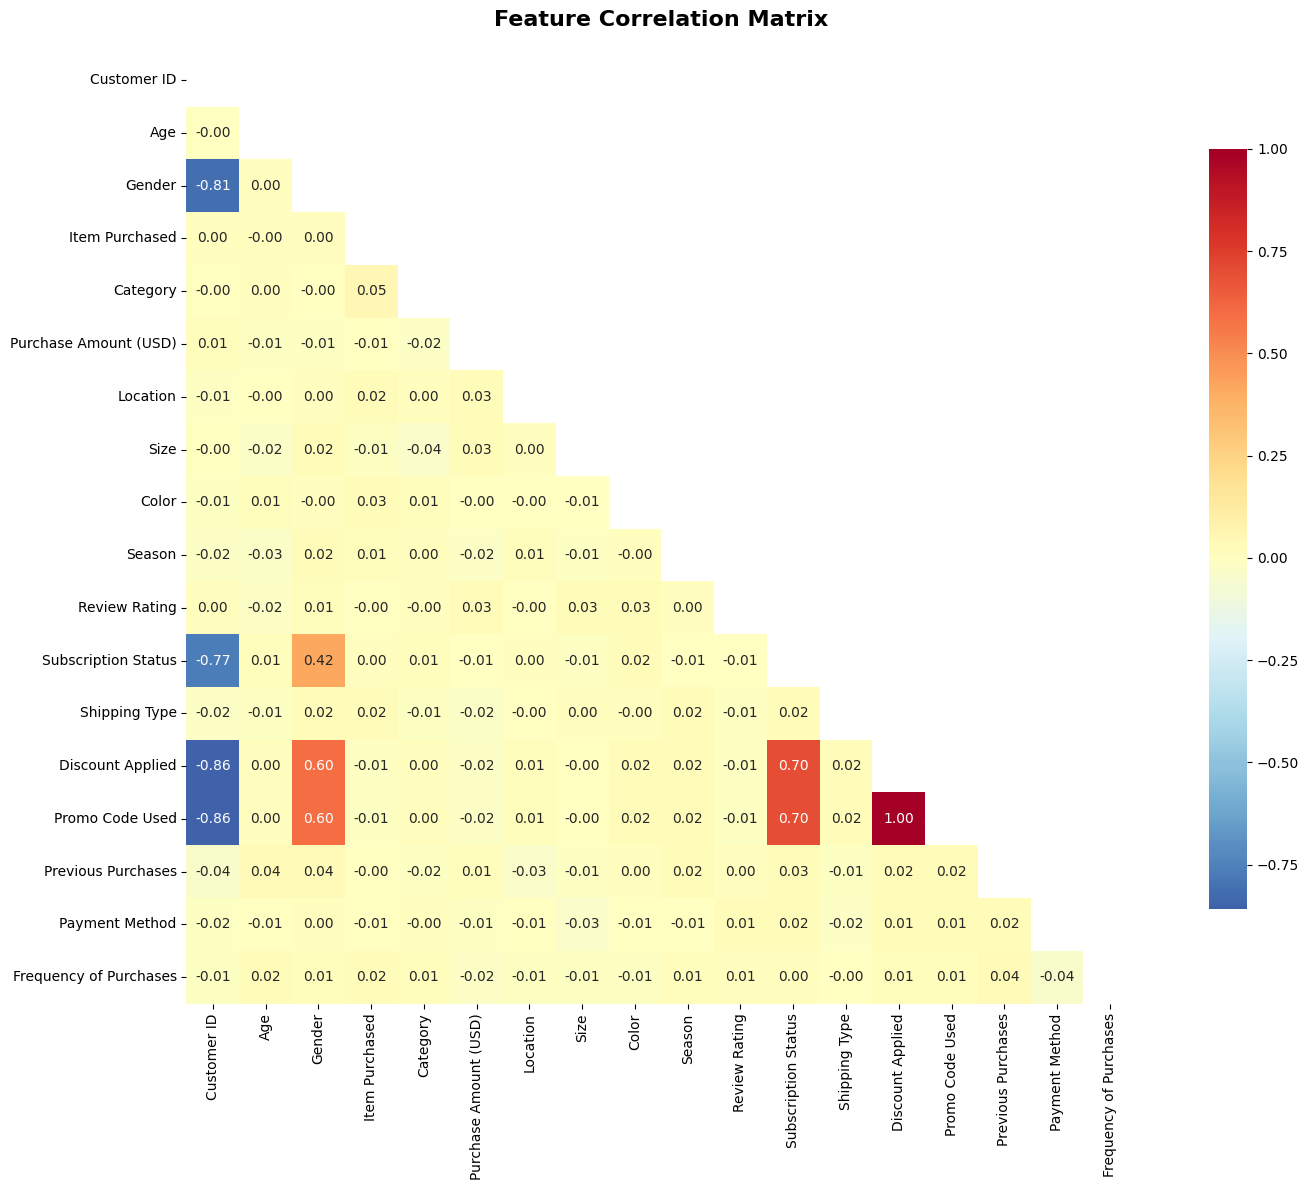


🎯 STRONGEST CORRELATIONS WITH SUBSCRIPTION STATUS:
------------------------------------------------------------
  Customer ID               0.769 (negative)
  Promo Code Used           0.700 (positive)
  Discount Applied          0.700 (positive)
  Gender                    0.417 (positive)
  Previous Purchases        0.031 (positive)
  Color                     0.021 (positive)
  Shipping Type             0.017 (positive)
  Payment Method            0.016 (positive)
  Size                      0.015 (negative)
  Category                  0.011 (positive)


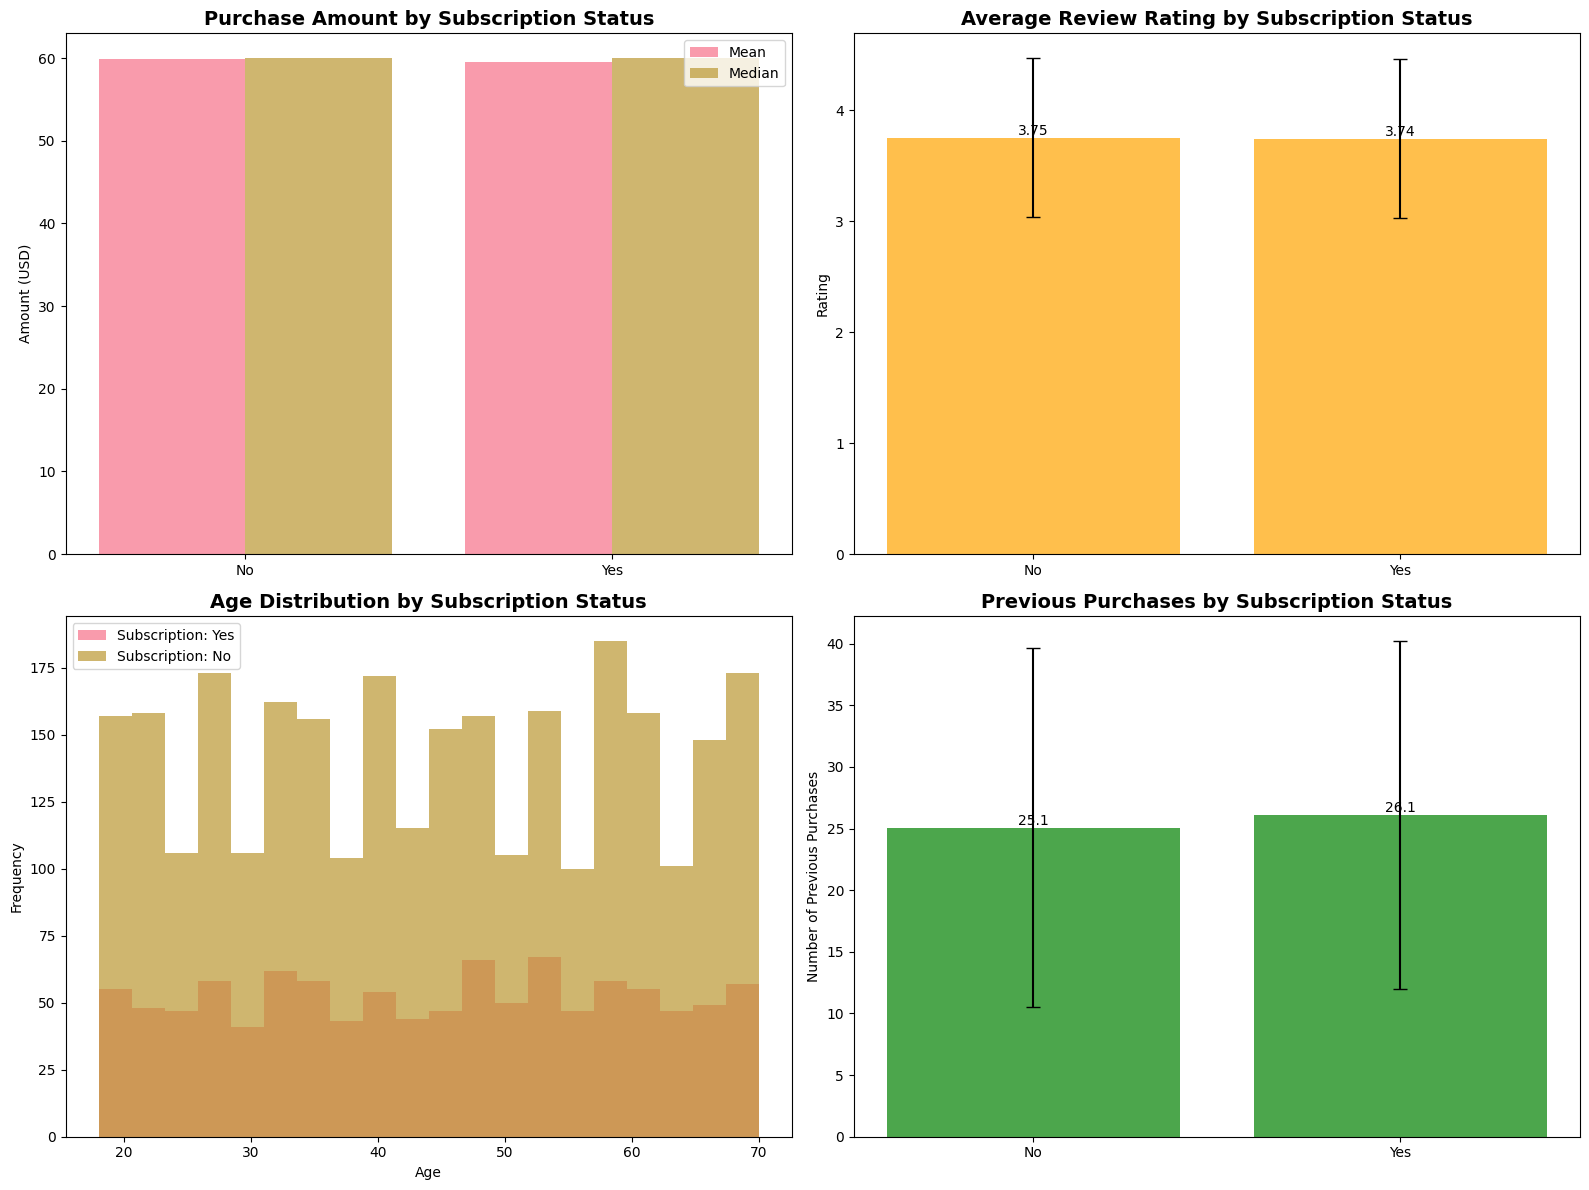


📊 STATISTICAL TESTS:
----------------------------------------
Purchase Amount t-test: t=-0.437, p=6.623e-01
Review Rating t-test: t=-0.398, p=6.910e-01
Age t-test: t=0.405, p=6.853e-01

💡 Interpretation: p < 0.05 indicates statistically significant difference between groups


In [20]:
# ================================
# 🔗 FEATURE RELATIONSHIPS & CORRELATION ANALYSIS
# ================================

print("🔗 ANALYZING FEATURE RELATIONSHIPS")
print("=" * 50)

# Create a copy for analysis and encode categorical variables
data_analysis = data.copy()

# Encode categorical variables for correlation analysis
categorical_cols = data_analysis.select_dtypes(include=['object']).columns
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_analysis[col] = le.fit_transform(data_analysis[col].astype(str))
    encoders[col] = le

# Correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = data_analysis.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find strongest correlations with target variable
target_corr = correlation_matrix[target_column].abs().sort_values(ascending=False)[1:]  # Exclude self-correlation
print(f"\n🎯 STRONGEST CORRELATIONS WITH {target_column.upper()}:")
print("-" * 60)
for feature, corr in target_corr.head(10).items():
    direction = "positive" if correlation_matrix[target_column][feature] > 0 else "negative"
    print(f"  {feature:<25} {corr:.3f} ({direction})")

# Feature relationships with target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Purchase Amount vs Subscription Status
subscription_amounts = data.groupby('Subscription Status')['Purchase Amount (USD)'].agg(['mean', 'median', 'std'])
x_pos = np.arange(len(subscription_amounts))
axes[0,0].bar(x_pos - 0.2, subscription_amounts['mean'], 0.4, label='Mean', alpha=0.7)
axes[0,0].bar(x_pos + 0.2, subscription_amounts['median'], 0.4, label='Median', alpha=0.7)
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(subscription_amounts.index)
axes[0,0].set_title('Purchase Amount by Subscription Status', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Amount (USD)')
axes[0,0].legend()

# Review Rating vs Subscription Status
rating_by_sub = data.groupby('Subscription Status')['Review Rating'].agg(['mean', 'std'])
x_pos = np.arange(len(rating_by_sub))
bars = axes[0,1].bar(x_pos, rating_by_sub['mean'], alpha=0.7,
                     yerr=rating_by_sub['std'], capsize=5, color='orange')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(rating_by_sub.index)
axes[0,1].set_title('Average Review Rating by Subscription Status', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Rating')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}', ha='center', va='bottom')

# Age distribution by subscription status
for i, status in enumerate(data['Subscription Status'].unique()):
    subset = data[data['Subscription Status'] == status]
    axes[1,0].hist(subset['Age'], alpha=0.7, label=f'Subscription: {status}', bins=20)
axes[1,0].set_title('Age Distribution by Subscription Status', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Previous Purchases vs Subscription
prev_purchases_by_sub = data.groupby('Subscription Status')['Previous Purchases'].agg(['mean', 'std'])
x_pos = np.arange(len(prev_purchases_by_sub))
bars = axes[1,1].bar(x_pos, prev_purchases_by_sub['mean'], alpha=0.7,
                     yerr=prev_purchases_by_sub['std'], capsize=5, color='green')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(prev_purchases_by_sub.index)
axes[1,1].set_title('Previous Purchases by Subscription Status', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Number of Previous Purchases')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Statistical significance tests
from scipy.stats import ttest_ind, chi2_contingency

print(f"\n📊 STATISTICAL TESTS:")
print("-" * 40)

# T-test for continuous variables
yes_sub = data[data['Subscription Status'] == 'Yes']
no_sub = data[data['Subscription Status'] == 'No']

# Purchase Amount t-test
t_stat, p_val = ttest_ind(yes_sub['Purchase Amount (USD)'], no_sub['Purchase Amount (USD)'])
print(f"Purchase Amount t-test: t={t_stat:.3f}, p={p_val:.3e}")

# Review Rating t-test
t_stat, p_val = ttest_ind(yes_sub['Review Rating'], no_sub['Review Rating'])
print(f"Review Rating t-test: t={t_stat:.3f}, p={p_val:.3e}")

# Age t-test
t_stat, p_val = ttest_ind(yes_sub['Age'], no_sub['Age'])
print(f"Age t-test: t={t_stat:.3f}, p={p_val:.3e}")

print("\n💡 Interpretation: p < 0.05 indicates statistically significant difference between groups")

In [21]:
# ================================
# 🔧 DATA PREPROCESSING PIPELINE
# ================================

print("🔧 DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 60)

# Define target and features
target_column = "Subscription Status"

if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset!")

# Separate features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

print(f"✅ Target variable: {target_column}")
print(f"📊 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")

# Display original target distribution
print(f"\n🎯 ORIGINAL TARGET DISTRIBUTION:")
original_dist = y.value_counts()
for label, count in original_dist.items():
    pct = (count / len(y)) * 100
    print(f"  {label}: {count} ({pct:.1f}%)")

# Step 1: Encode target variable
print(f"\n1️⃣ ENCODING TARGET VARIABLE")
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)
print(f"   Original classes: {target_le.classes_}")
print(f"   Encoded mapping: {dict(zip(target_le.classes_, range(len(target_le.classes_))))}")

# Step 2: Handle categorical features
print(f"\n2️⃣ ENCODING CATEGORICAL FEATURES")
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"   Categorical columns ({len(categorical_cols)}): {categorical_cols}")

X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    unique_count = len(le.classes_)
    print(f"   ✓ {col}: {unique_count} unique values encoded")

# Step 3: Scale numerical features
print(f"\n3️⃣ SCALING NUMERICAL FEATURES")
numerical_cols = X_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"   Numerical columns ({len(numerical_cols)}): {numerical_cols}")

scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Display scaling statistics
scaling_stats = pd.DataFrame({
    'Feature': numerical_cols,
    'Original_Mean': X_encoded[numerical_cols].mean().values,
    'Original_Std': X_encoded[numerical_cols].std().values,
    'Scaled_Mean': X_scaled[numerical_cols].mean().values,
    'Scaled_Std': X_scaled[numerical_cols].std().values
})
print("   Scaling verification (should be ~0 mean, ~1 std for scaled):")
print(scaling_stats.round(3))

print(f"\n✅ PREPROCESSING COMPLETED")
print(f"   Final feature matrix shape: {X_scaled.shape}")
print(f"   All features are now numerical and scaled!")

🔧 DATA PREPROCESSING & FEATURE ENGINEERING
✅ Target variable: Subscription Status
📊 Feature matrix shape: (3900, 17)
🎯 Target vector shape: (3900,)

🎯 ORIGINAL TARGET DISTRIBUTION:
  No: 2847 (73.0%)
  Yes: 1053 (27.0%)

1️⃣ ENCODING TARGET VARIABLE
   Original classes: ['No' 'Yes']
   Encoded mapping: {'No': 0, 'Yes': 1}

2️⃣ ENCODING CATEGORICAL FEATURES
   Categorical columns (12): ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
   ✓ Gender: 2 unique values encoded
   ✓ Item Purchased: 25 unique values encoded
   ✓ Category: 4 unique values encoded
   ✓ Location: 50 unique values encoded
   ✓ Size: 4 unique values encoded
   ✓ Color: 25 unique values encoded
   ✓ Season: 4 unique values encoded
   ✓ Shipping Type: 6 unique values encoded
   ✓ Discount Applied: 2 unique values encoded
   ✓ Promo Code Used: 2 unique values encoded
   ✓ Payment Method: 6 u

⚖️ CLASS IMBALANCE ANALYSIS & CORRECTION
📊 ORIGINAL CLASS DISTRIBUTION:
   Class 0 (No): 2847 (73.0%)
   Class 1 (Yes): 1053 (27.0%)

⚖️ Imbalance Ratio: 2.70:1
   ⚠️  Significant class imbalance detected! Applying SMOTE...

🔄 AFTER SMOTE BALANCING:
   Class 0 (No): 2847 (50.0%)
   Class 1 (Yes): 2847 (50.0%)

📈 Dataset size change: 3900 → 5694 samples


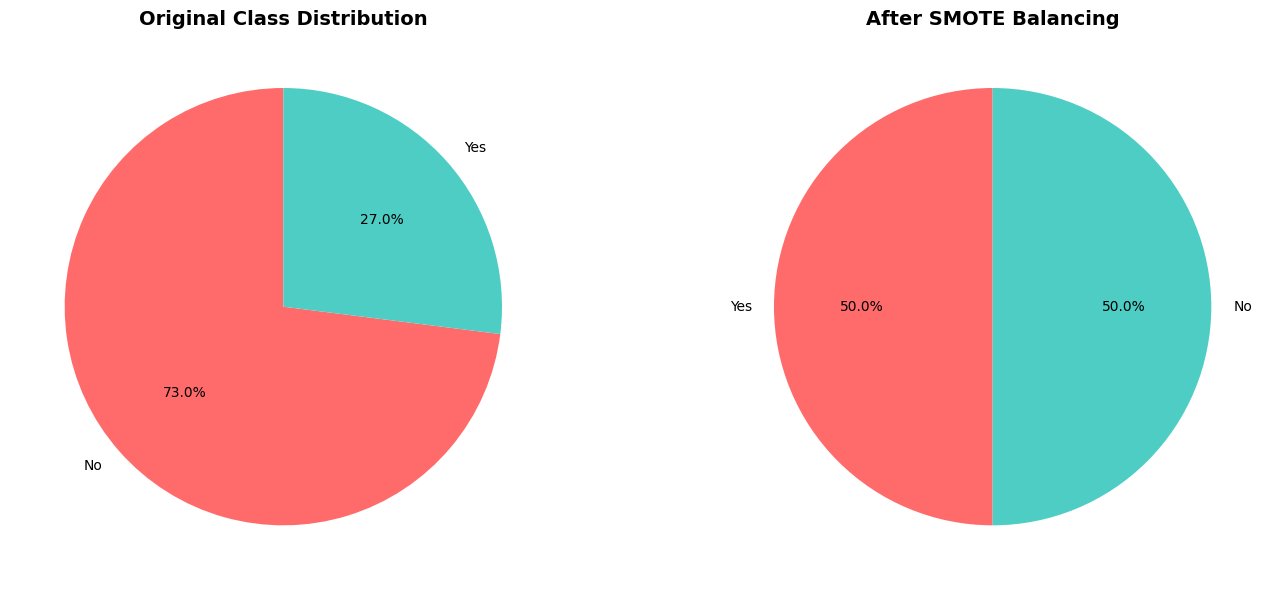

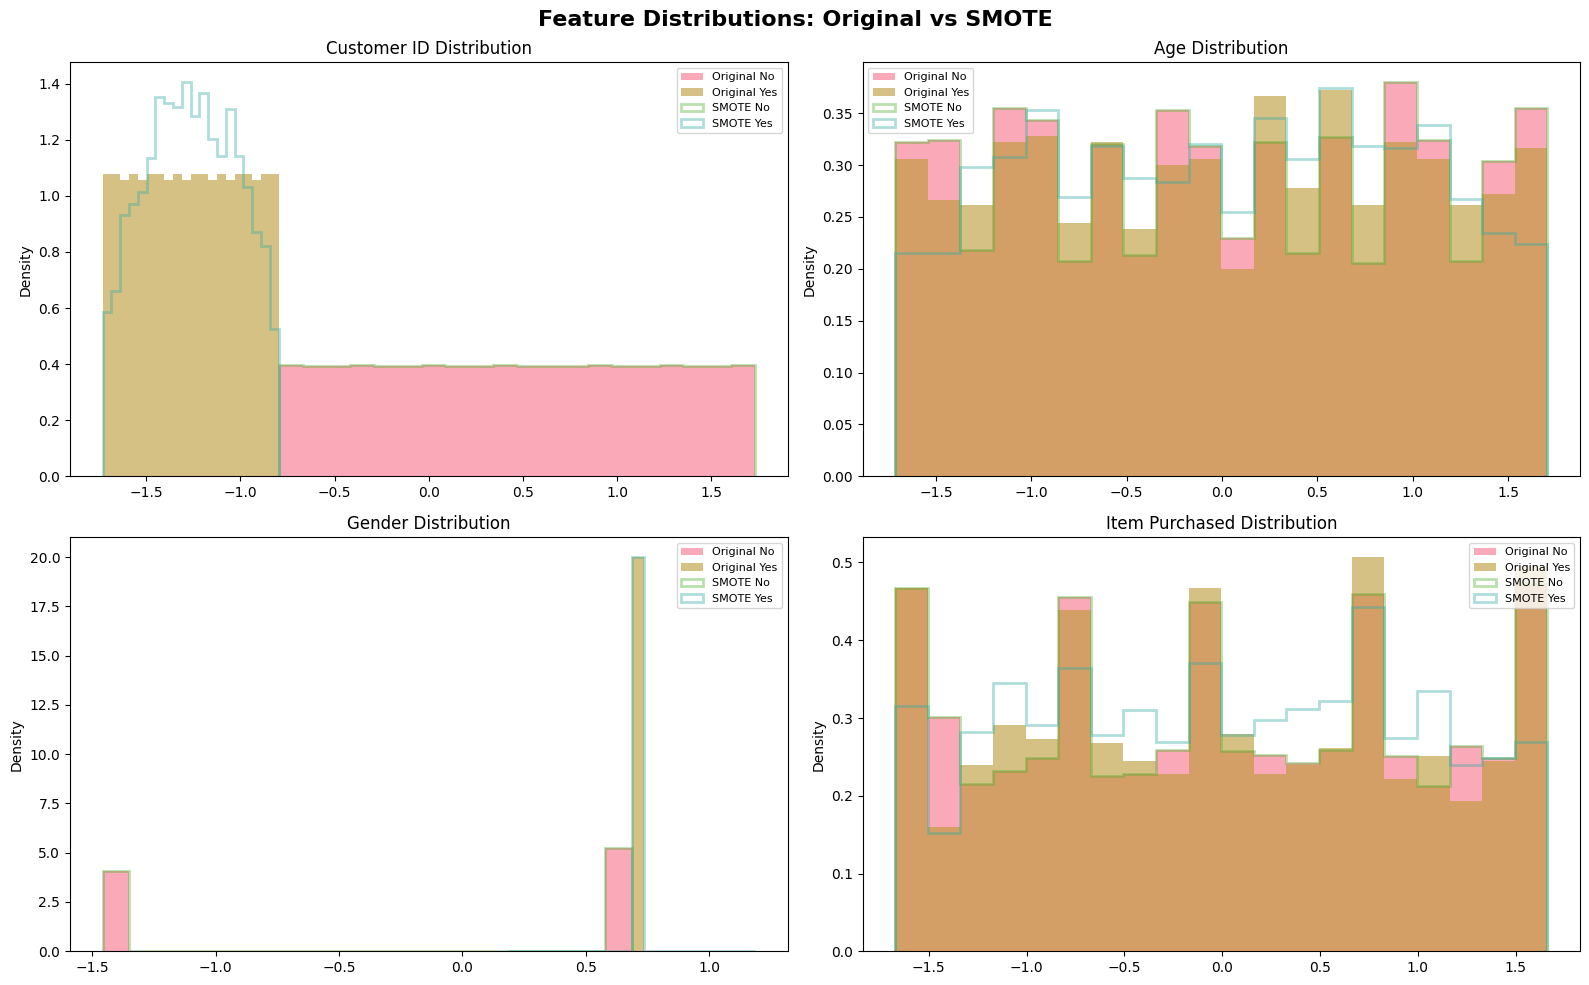


✅ CLASS BALANCING COMPLETED
   Final dataset shape: (5694, 17)
   Ready for model training!


In [22]:
# ================================
# ⚖️ HANDLING CLASS IMBALANCE
# ================================

print("⚖️ CLASS IMBALANCE ANALYSIS & CORRECTION")
print("=" * 50)

# Analyze class imbalance
class_counts = pd.Series(y_encoded).value_counts().sort_index()
class_labels = [target_le.classes_[i] for i in class_counts.index]

print("📊 ORIGINAL CLASS DISTRIBUTION:")
for i, (label, count) in enumerate(zip(class_labels, class_counts.values)):
    pct = (count / len(y_encoded)) * 100
    print(f"   Class {i} ({label}): {count} ({pct:.1f}%)")

# Calculate imbalance ratio
majority_count = class_counts.max()
minority_count = class_counts.min()
imbalance_ratio = majority_count / minority_count
print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("   ⚠️  Significant class imbalance detected! Applying SMOTE...")
    apply_smote = True
else:
    print("   ✅ Classes are relatively balanced")
    apply_smote = False

# Apply SMOTE if needed
if apply_smote:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

    print(f"\n🔄 AFTER SMOTE BALANCING:")
    resampled_counts = pd.Series(y_resampled).value_counts().sort_index()
    for i, count in enumerate(resampled_counts.values):
        pct = (count / len(y_resampled)) * 100
        label = target_le.classes_[i]
        print(f"   Class {i} ({label}): {count} ({pct:.1f}%)")

    print(f"\n📈 Dataset size change: {len(y_encoded)} → {len(y_resampled)} samples")
else:
    X_resampled, y_resampled = X_scaled, y_encoded

# Visualization of class balance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before balancing
class_counts_original = pd.Series(y_encoded).value_counts()
labels_original = [target_le.classes_[i] for i in class_counts_original.index]
colors = ['#FF6B6B', '#4ECDC4']

ax1.pie(class_counts_original.values, labels=labels_original, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax1.set_title('Original Class Distribution', fontsize=14, fontweight='bold')

# After balancing
class_counts_balanced = pd.Series(y_resampled).value_counts()
labels_balanced = [target_le.classes_[i] for i in class_counts_balanced.index]

ax2.pie(class_counts_balanced.values, labels=labels_balanced, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('After SMOTE Balancing', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Feature distribution comparison (before/after SMOTE)
if apply_smote:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Select a few numerical features for comparison
    sample_features = numerical_cols[:4]  # First 4 numerical features

    for i, feature in enumerate(sample_features):
        ax = axes[i//2, i%2]

        # Original feature distribution by class
        for class_idx in range(len(class_labels)):
            class_data = X_scaled[y_encoded == class_idx][feature]
            ax.hist(class_data, alpha=0.6, label=f'Original {class_labels[class_idx]}',
                   bins=20, density=True)

        # SMOTE feature distribution by class
        X_resampled_df = pd.DataFrame(X_resampled, columns=X_scaled.columns)
        for class_idx in range(len(class_labels)):
            class_data = X_resampled_df[y_resampled == class_idx][feature]
            ax.hist(class_data, alpha=0.4, label=f'SMOTE {class_labels[class_idx]}',
                   bins=20, density=True, histtype='step', linewidth=2)

        ax.set_title(f'{feature} Distribution', fontsize=12)
        ax.legend(fontsize=8)
        ax.set_ylabel('Density')

    plt.suptitle('Feature Distributions: Original vs SMOTE', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print(f"\n✅ CLASS BALANCING COMPLETED")
print(f"   Final dataset shape: {X_resampled.shape}")
print(f"   Ready for model training!")

In [23]:
# ================================
# 🤖 MACHINE LEARNING MODEL PIPELINE
# ================================

print("🤖 TRAINING MULTIPLE ML MODELS")
print("=" * 50)

# Define comprehensive model suite
models = {
    '🌲 RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    '📈 LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    '🌳 DecisionTree': DecisionTreeClassifier(random_state=42),
    '🚀 GradientBoosting': GradientBoostingClassifier(random_state=42),
    '👥 KNN': KNeighborsClassifier(n_neighbors=5),
    '🔍 SVM': SVC(probability=True, random_state=42),
    '⚡ XGBoost': xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

print(f"📋 Models to train: {len(models)}")
for name in models.keys():
    print(f"   • {name}")

# Setup cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Import additional metrics
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Define comprehensive scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=0),
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_weighted': make_scorer(recall_score, average='weighted', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', average='weighted')
}

print(f"\n🎯 Comprehensive Evaluation Metrics:")
print("   • Accuracy: Overall correctness of predictions")
print("   • Precision (Weighted): True positives / (True positives + False positives) - weighted by class frequency")
print("   • Precision (Macro): Average precision across all classes")
print("   • Recall (Weighted): True positives / (True positives + False negatives) - weighted by class frequency")
print("   • Recall (Macro): Average recall across all classes")
print("   • F1-Weighted: Harmonic mean of precision and recall - weighted by class frequency")
print("   • F1-Macro: Harmonic mean of precision and recall - averaged across classes")
print("   • ROC-AUC: Area Under the Receiver Operating Characteristic Curve")
print(f"   • Cross-validation: {kf.n_splits}-fold stratified")

# Train and evaluate all models
results = []
detailed_results = {}

print(f"\n🔄 TRAINING MODELS...")
print("-" * 70)

for name, model in models.items():
    print(f"Training {name}...")

    try:
        # Perform cross-validation
        cv_scores = cross_validate(
            model, X_resampled, y_resampled,
            cv=kf,
            scoring=scoring_metrics,
            n_jobs=-1,
            return_train_score=True
        )

        # Calculate mean and std for each metric
        results.append({
            'Model': name.replace('🌲 ', '').replace('📈 ', '').replace('🌳 ', '').replace('🚀 ', '').replace('👥 ', '').replace('🔍 ', '').replace('⚡ ', ''),
            'Accuracy': cv_scores['test_accuracy'].mean(),
            'Accuracy_Std': cv_scores['test_accuracy'].std(),
            'Precision_Weighted': cv_scores['test_precision_weighted'].mean(),
            'Precision_Weighted_Std': cv_scores['test_precision_weighted'].std(),
            'Precision_Macro': cv_scores['test_precision_macro'].mean(),
            'Precision_Macro_Std': cv_scores['test_precision_macro'].std(),
            'Recall_Weighted': cv_scores['test_recall_weighted'].mean(),
            'Recall_Weighted_Std': cv_scores['test_recall_weighted'].std(),
            'Recall_Macro': cv_scores['test_recall_macro'].mean(),
            'Recall_Macro_Std': cv_scores['test_recall_macro'].std(),
            'F1_Weighted': cv_scores['test_f1_weighted'].mean(),
            'F1_Weighted_Std': cv_scores['test_f1_weighted'].std(),
            'F1_Macro': cv_scores['test_f1_macro'].mean(),
            'F1_Macro_Std': cv_scores['test_f1_macro'].std(),
            'ROC_AUC': cv_scores['test_roc_auc'].mean(),
            'ROC_AUC_Std': cv_scores['test_roc_auc'].std()
        })

        # Store detailed results
        detailed_results[name] = cv_scores

        # Print progress with comprehensive metrics
        acc_mean = cv_scores['test_accuracy'].mean()
        acc_std = cv_scores['test_accuracy'].std()
        prec_mean = cv_scores['test_precision_weighted'].mean()
        rec_mean = cv_scores['test_recall_weighted'].mean()
        f1_mean = cv_scores['test_f1_weighted'].mean()
        auc_mean = cv_scores['test_roc_auc'].mean()

        print(f"   ✓ Accuracy: {acc_mean:.4f} (±{acc_std:.4f})")
        print(f"     Precision: {prec_mean:.4f} | Recall: {rec_mean:.4f} | F1: {f1_mean:.4f} | AUC: {auc_mean:.4f}")

    except Exception as e:
        print(f"   ❌ Error training {name}: {str(e)}")
        continue

print(f"\n✅ MODEL TRAINING COMPLETED!")
print(f"   Successfully trained: {len(results)} models")

🤖 TRAINING MULTIPLE ML MODELS
📋 Models to train: 7
   • 🌲 RandomForest
   • 📈 LogisticRegression
   • 🌳 DecisionTree
   • 🚀 GradientBoosting
   • 👥 KNN
   • 🔍 SVM
   • ⚡ XGBoost

🎯 Comprehensive Evaluation Metrics:
   • Accuracy: Overall correctness of predictions
   • Precision (Weighted): True positives / (True positives + False positives) - weighted by class frequency
   • Precision (Macro): Average precision across all classes
   • Recall (Weighted): True positives / (True positives + False negatives) - weighted by class frequency
   • Recall (Macro): Average recall across all classes
   • F1-Weighted: Harmonic mean of precision and recall - weighted by class frequency
   • F1-Macro: Harmonic mean of precision and recall - averaged across classes
   • ROC-AUC: Area Under the Receiver Operating Characteristic Curve
   • Cross-validation: 5-fold stratified

🔄 TRAINING MODELS...
----------------------------------------------------------------------
Training 🌲 RandomForest...
   ✓ Accu

📊 COMPREHENSIVE MODEL PERFORMANCE ANALYSIS

🏆 MODEL LEADERBOARD (by Accuracy):
📊 DETAILED METRICS TABLE:
Model           Accuracy     Precision    Recall       F1-Score    
------------------------------------------------------------------------------------------------------------------------
RandomForest    0.9998       0.9998       0.9998       0.9998
DecisionTree    0.9998       0.9998       0.9998       0.9998
GradientBoosting 0.9998       0.9998       0.9998       0.9998
XGBoost         0.9998       0.9998       0.9998       0.9998
LogisticRegression 0.9921       0.9922       0.9921       0.9921
SVM             0.9828       0.9831       0.9828       0.9828
KNN             0.8966       0.9108       0.8966       0.8956

🏆 MODEL LEADERBOARD (by Accuracy):
RandomForest        
  Accuracy:  0.9998 (±0.0004)
  Precision: 0.9998 (±0.0004)
  Recall:    0.9998 (±0.0004)
  F1-Score:  0.9998 (±0.0004)
--------------------------------------------------
DecisionTree        
  Accuracy:  0.9998

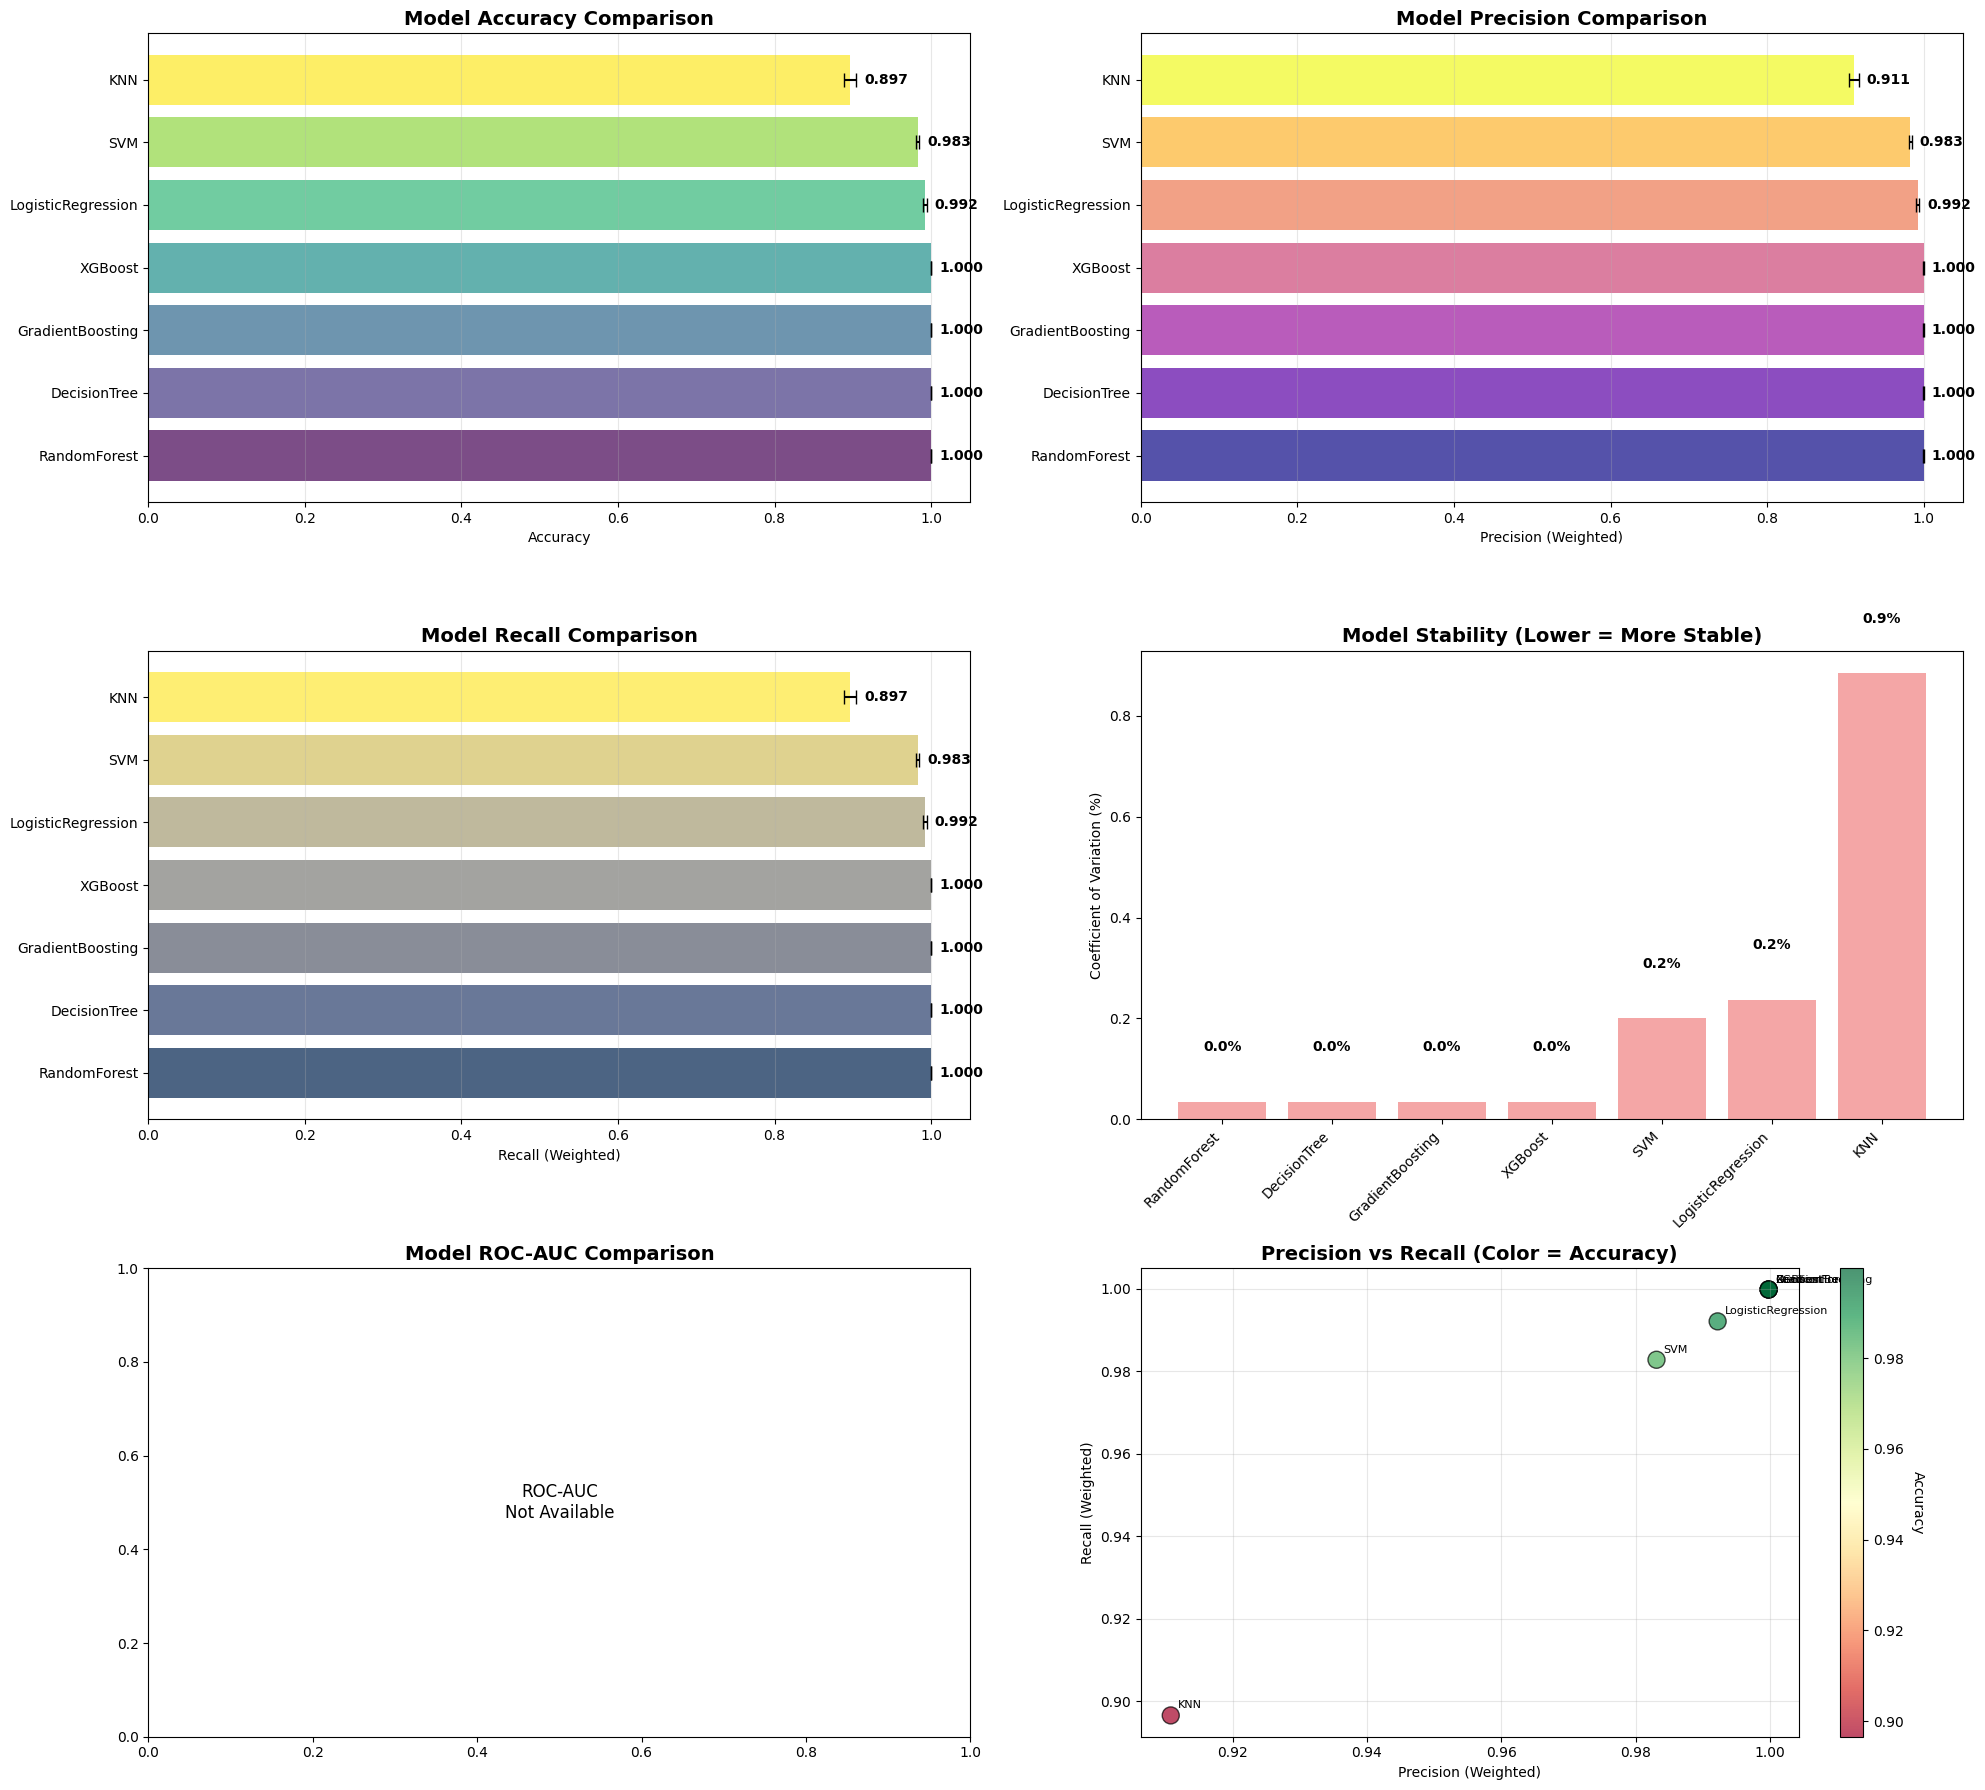


📊 COMPREHENSIVE METRICS COMPARISON TABLE
             Model  Accuracy  Precision_W  Precision_M  Recall_W  Recall_M   F1_W   F1_M
      RandomForest    0.9998       0.9998       0.9998    0.9998    0.9998 0.9998 0.9998
      DecisionTree    0.9998       0.9998       0.9998    0.9998    0.9998 0.9998 0.9998
  GradientBoosting    0.9998       0.9998       0.9998    0.9998    0.9998 0.9998 0.9998
           XGBoost    0.9998       0.9998       0.9998    0.9998    0.9998 0.9998 0.9998
LogisticRegression    0.9921       0.9922       0.9922    0.9921    0.9921 0.9921 0.9921
               SVM    0.9828       0.9831       0.9831    0.9828    0.9828 0.9828 0.9828
               KNN    0.8966       0.9108       0.9108    0.8966    0.8966 0.8956 0.8956

🎯 RADAR CHART COMPARISON - TOP 3 MODELS


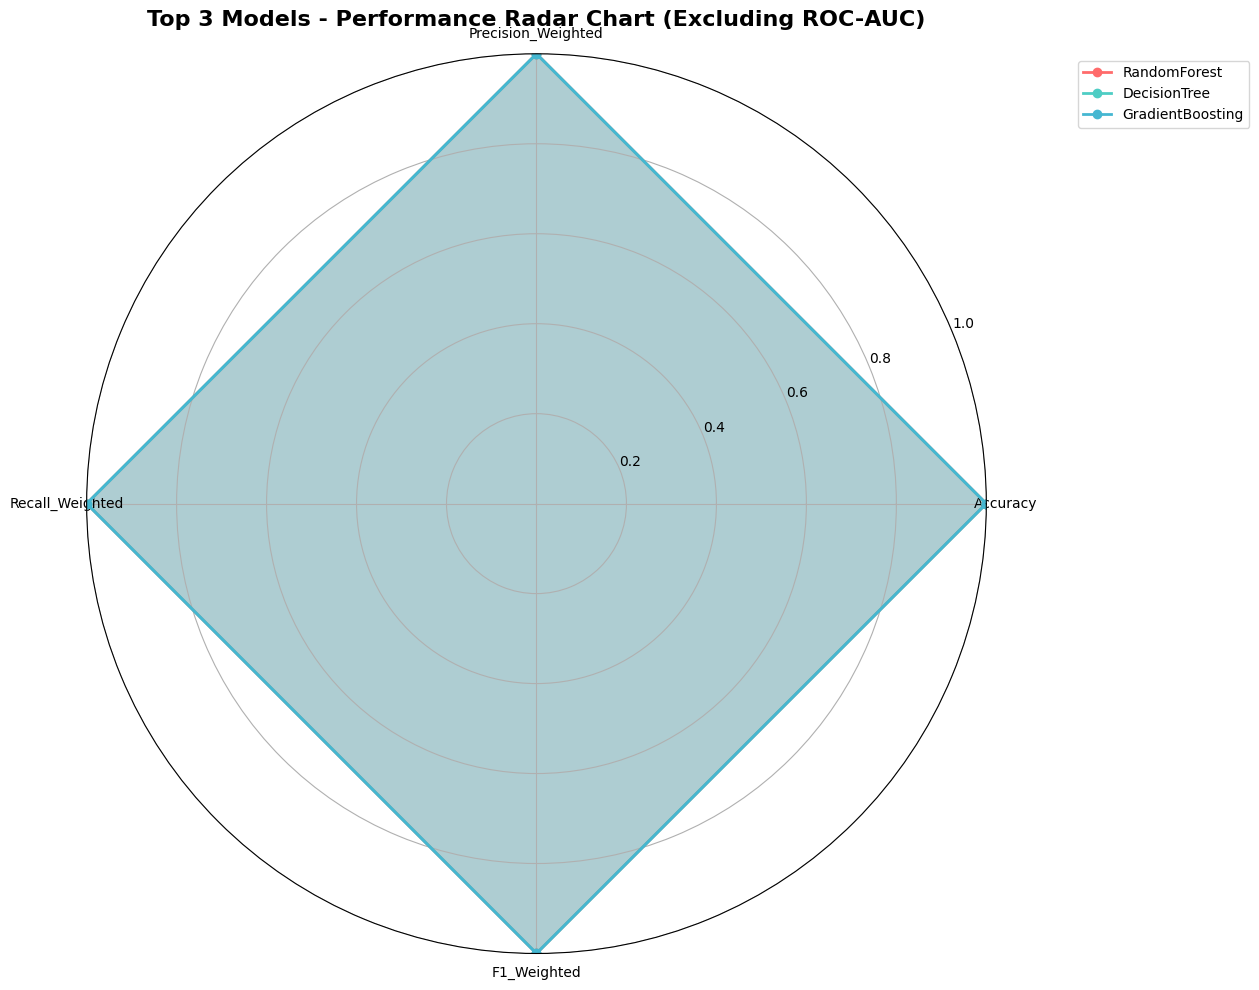


📈 CROSS-VALIDATION STABILITY ANALYSIS
Coefficient of Variation (%) - Lower values indicate more stable performance:
             Model  Accuracy_CV  Precision_CV  Recall_CV  F1_CV
      RandomForest         0.04          0.04       0.04   0.04
      DecisionTree         0.04          0.04       0.04   0.04
  GradientBoosting         0.04          0.04       0.04   0.04
           XGBoost         0.04          0.04       0.04   0.04
               SVM         0.20          0.18       0.20   0.20
LogisticRegression         0.24          0.23       0.24   0.24
               KNN         0.88          0.69       0.88   0.91

🏆 Most Stable Model Overall: RandomForest (Avg CV: 0.04%)

📈 COMPREHENSIVE PERFORMANCE STATISTICS:
🎯 BEST PERFORMERS BY METRIC:
   Best Accuracy:  RandomForest (0.9998)
   Best Precision: RandomForest (0.9998)
   Best Recall:    RandomForest (0.9998)
   Best F1-Score:  RandomForest (0.9998)

📊 METRIC RANGES & AVERAGES:
   Accuracy          : Mean=0.9815, Std=0.0380, R

In [24]:
# ================================
# 📊 MODEL PERFORMANCE ANALYSIS
# ================================

print("📊 COMPREHENSIVE MODEL PERFORMANCE ANALYSIS")
print("=" * 60)

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\n🏆 MODEL LEADERBOARD (by Accuracy):")
print("=" * 80)

# Display comprehensive formatted results
print("📊 DETAILED METRICS TABLE:")
print("=" * 120)
print(f"{'Model':<15} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 120)

for idx, row in results_df.iterrows():
    model_name = row['Model']
    accuracy = row['Accuracy']
    precision = row['Precision_Weighted']
    recall = row['Recall_Weighted']
    f1_weighted = row['F1_Weighted']
    # roc_auc = row['ROC_AUC'] # Removed ROC-AUC from table

    print(f"{model_name:<15} {accuracy:.4f}       {precision:.4f}       {recall:.4f}       {f1_weighted:.4f}") # Removed ROC-AUC from print

print("\n🏆 MODEL LEADERBOARD (by Accuracy):")
print("=" * 100)

# Display formatted results with error bars
for idx, row in results_df.iterrows():
    model_name = row['Model']
    accuracy = row['Accuracy']
    acc_std = row['Accuracy_Std']
    precision = row['Precision_Weighted']
    prec_std = row['Precision_Weighted_Std']
    recall = row['Recall_Weighted']
    rec_std = row['Recall_Weighted_Std']
    f1_weighted = row['F1_Weighted']
    f1_std = row['F1_Weighted_Std']

    print(f"{model_name:<20}")
    print(f"  Accuracy:  {accuracy:.4f} (±{acc_std:.4f})")
    print(f"  Precision: {precision:.4f} (±{prec_std:.4f})")
    print(f"  Recall:    {recall:.4f} (±{rec_std:.4f})")
    print(f"  F1-Score:  {f1_weighted:.4f} (±{f1_std:.4f})")
    print("-" * 50)
# Visualization 1: Enhanced Model Performance Comparison
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Models and metrics for visualization
models_display = results_df['Model'].tolist()
accuracy_means = results_df['Accuracy'].tolist()
accuracy_stds = results_df['Accuracy_Std'].tolist()
precision_means = results_df['Precision_Weighted'].tolist()
precision_stds = results_df['Precision_Weighted_Std'].tolist()
recall_means = results_df['Recall_Weighted'].tolist()
recall_stds = results_df['Recall_Weighted_Std'].tolist()
f1_means = results_df['F1_Weighted'].tolist()
f1_stds = results_df['F1_Weighted_Std'].tolist()
# auc_means = results_df['ROC_AUC'].tolist() # Removed ROC-AUC from visualization data
# auc_stds = results_df['ROC_AUC_Std'].tolist() # Removed ROC-AUC from visualization data

# 1. Accuracy comparison with error bars
bars1 = axes[0,0].barh(range(len(models_display)), accuracy_means,
                       xerr=accuracy_stds, capsize=5, alpha=0.7,
                       color=plt.cm.viridis(np.linspace(0, 1, len(models_display))))
axes[0,0].set_yticks(range(len(models_display)))
axes[0,0].set_yticklabels(models_display)
axes[0,0].set_xlabel('Accuracy')
axes[0,0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, acc, std) in enumerate(zip(bars1, accuracy_means, accuracy_stds)):
    axes[0,0].text(bar.get_width() + std + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{acc:.3f}', va='center', fontweight='bold')

# 2. Precision comparison
bars2 = axes[0,1].barh(range(len(models_display)), precision_means,
                       xerr=precision_stds, capsize=5, alpha=0.7,
                       color=plt.cm.plasma(np.linspace(0, 1, len(models_display))))
axes[0,1].set_yticks(range(len(models_display)))
axes[0,1].set_yticklabels(models_display)
axes[0,1].set_xlabel('Precision (Weighted)')
axes[0,1].set_title('Model Precision Comparison', fontsize=14, fontweight='bold')
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, prec, std) in enumerate(zip(bars2, precision_means, precision_stds)):
    axes[0,1].text(bar.get_width() + std + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{prec:.3f}', va='center', fontweight='bold')

# 3. Recall comparison
bars3 = axes[1,0].barh(range(len(models_display)), recall_means,
                       xerr=recall_stds, capsize=5, alpha=0.7,
                       color=plt.cm.cividis(np.linspace(0, 1, len(models_display))))
axes[1,0].set_yticks(range(len(models_display)))
axes[1,0].set_yticklabels(models_display)
axes[1,0].set_xlabel('Recall (Weighted)')
axes[1,0].set_title('Model Recall Comparison', fontsize=14, fontweight='bold')
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, rec, std) in enumerate(zip(bars3, recall_means, recall_stds)):
    axes[1,0].text(bar.get_width() + std + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{rec:.3f}', va='center', fontweight='bold')

# 4. F1-Score comparison
bars4 = axes[1,1].barh(range(len(models_display)), f1_means,
                       xerr=f1_stds, capsize=5, alpha=0.7,
                       color=plt.cm.inferno(np.linspace(0, 1, len(models_display))))
axes[1,1].set_yticks(range(len(models_display)))
axes[1,1].set_yticklabels(models_display)
axes[1,1].set_xlabel('F1-Score (Weighted)')
axes[1,1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, f1, std) in enumerate(zip(bars4, f1_means, f1_stds)):
    axes[1,1].text(bar.get_width() + std + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{f1:.3f}', va='center', fontweight='bold')

# 5. ROC-AUC comparison (Placeholder)
axes[2,0].text(0.5, 0.5, 'ROC-AUC\nNot Available',
               ha='center', va='center', fontsize=12, transform=axes[2,0].transAxes)
axes[2,0].set_title('Model ROC-AUC Comparison', fontsize=14, fontweight='bold')


# 6. Precision vs Recall scatter plot
scatter = axes[2,1].scatter(precision_means, recall_means,
                           s=150, alpha=0.7, c=accuracy_means, cmap='RdYlGn',
                           edgecolors='black', linewidth=1)
axes[2,1].set_xlabel('Precision (Weighted)')
axes[2,1].set_ylabel('Recall (Weighted)')
axes[2,1].set_title('Precision vs Recall (Color = Accuracy)', fontsize=14, fontweight='bold')
axes[2,1].grid(alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[2,1])
cbar.set_label('Accuracy', rotation=270, labelpad=15)

# Add model labels to scatter plot
for i, model in enumerate(models_display):
    axes[2,1].annotate(model,
                      (precision_means[i], recall_means[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

# Cross-validation stability (coefficient of variation)
cv_stability = (results_df['Accuracy_Std'] / results_df['Accuracy']) * 100
stability_df = pd.DataFrame({
    'Model': results_df['Model'],
    'CV_Stability': cv_stability
}).sort_values('CV_Stability')

# Replace the old stability plot in axes[1,1] with the new one
axes[1,1].clear() # Clear the previous F1-Score plot
bars3 = axes[1,1].bar(range(len(stability_df)), stability_df['CV_Stability'],
                      alpha=0.7, color='lightcoral')
axes[1,1].set_xticks(range(len(stability_df)))
axes[1,1].set_xticklabels(stability_df['Model'], rotation=45, ha='right')
axes[1,1].set_ylabel('Coefficient of Variation (%)')
axes[1,1].set_title('Model Stability (Lower = More Stable)', fontsize=14, fontweight='bold')

# Add value labels
for bar, cv in zip(bars3, stability_df['CV_Stability']):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{cv:.1f}%', ha='center', fontweight='bold')


plt.tight_layout()
plt.show()

# Create a comprehensive metrics comparison table
print(f"\n📊 COMPREHENSIVE METRICS COMPARISON TABLE")
print("=" * 140)

# Create a detailed metrics DataFrame for better visualization
metrics_comparison = pd.DataFrame({
    'Model': results_df['Model'],
    'Accuracy': results_df['Accuracy'].round(4),
    'Precision_W': results_df['Precision_Weighted'].round(4),
    'Precision_M': results_df['Precision_Macro'].round(4),
    'Recall_W': results_df['Recall_Weighted'].round(4),
    'Recall_M': results_df['Recall_Macro'].round(4),
    'F1_W': results_df['F1_Weighted'].round(4),
    'F1_M': results_df['F1_Macro'].round(4),
    # 'ROC_AUC': results_df['ROC_AUC'].round(4) # Removed ROC-AUC from table
})

print(metrics_comparison.to_string(index=False))

# Create radar chart for top 3 models
print(f"\n🎯 RADAR CHART COMPARISON - TOP 3 MODELS")

# Get top 3 models
top_3_models = results_df.head(3)

# Create radar chart
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

# Metrics for radar chart (excluding ROC_AUC)
metrics_radar = ['Accuracy', 'Precision_Weighted', 'Recall_Weighted', 'F1_Weighted']
angles = np.linspace(0, 2*np.pi, len(metrics_radar), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (idx, model_row) in enumerate(top_3_models.iterrows()):
    model_name = model_row['Model']
    values = [
        model_row['Accuracy'],
        model_row['Precision_Weighted'],
        model_row['Recall_Weighted'],
        model_row['F1_Weighted'],
        # model_row['ROC_AUC'] # Removed ROC-AUC from radar values
    ]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_radar)
ax.set_ylim(0, 1)
ax.set_title('Top 3 Models - Performance Radar Chart (Excluding ROC-AUC)', size=16, fontweight='bold', pad=20) # Updated title
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

# Cross-validation stability analysis
print(f"\n📈 CROSS-VALIDATION STABILITY ANALYSIS")
print("=" * 80)

# Calculate coefficient of variation for all metrics (excluding ROC_AUC)
cv_stability_comprehensive = pd.DataFrame({
    'Model': results_df['Model'],
    'Accuracy_CV': ((results_df['Accuracy_Std'] / results_df['Accuracy']) * 100).round(2),
    'Precision_CV': ((results_df['Precision_Weighted_Std'] / results_df['Precision_Weighted']) * 100).round(2),
    'Recall_CV': ((results_df['Recall_Weighted_Std'] / results_df['Recall_Weighted']) * 100).round(2),
    'F1_CV': ((results_df['F1_Weighted_Std'] / results_df['F1_Weighted']) * 100).round(2),
    # 'ROC_AUC_CV': ((results_df['ROC_AUC_Std'] / results_df['ROC_AUC']) * 100).round(2) # Removed ROC-AUC
}).sort_values('Accuracy_CV')

print("Coefficient of Variation (%) - Lower values indicate more stable performance:")
print(cv_stability_comprehensive.to_string(index=False))

# Identify most stable model across all metrics (excluding ROC_AUC)
cv_stability_comprehensive['Mean_CV'] = cv_stability_comprehensive[['Accuracy_CV', 'Precision_CV', 'Recall_CV', 'F1_CV']].mean(axis=1) # Excluded ROC_AUC_CV
most_stable_model = cv_stability_comprehensive.loc[cv_stability_comprehensive['Mean_CV'].idxmin(), 'Model']
most_stable_cv = cv_stability_comprehensive.loc[cv_stability_comprehensive['Mean_CV'].idxmin(), 'Mean_CV']

print(f"\n🏆 Most Stable Model Overall: {most_stable_model} (Avg CV: {most_stable_cv:.2f}%)")

# Enhanced Statistical Analysis
print(f"\n📈 COMPREHENSIVE PERFORMANCE STATISTICS:")
print("=" * 60)

# Best performing models for each metric (excluding ROC_AUC)
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]
best_precision_model = results_df.loc[results_df['Precision_Weighted'].idxmax()]
best_recall_model = results_df.loc[results_df['Recall_Weighted'].idxmax()]
best_f1_model = results_df.loc[results_df['F1_Weighted'].idxmax()]
# best_auc_model = results_df.loc[results_df['ROC_AUC'].idxmax()] # Removed ROC-AUC

print(f"🎯 BEST PERFORMERS BY METRIC:")
print(f"   Best Accuracy:  {best_accuracy_model['Model']} ({best_accuracy_model['Accuracy']:.4f})")
print(f"   Best Precision: {best_precision_model['Model']} ({best_precision_model['Precision_Weighted']:.4f})")
print(f"   Best Recall:    {best_recall_model['Model']} ({best_recall_model['Recall_Weighted']:.4f})")
print(f"   Best F1-Score:  {best_f1_model['Model']} ({best_f1_model['F1_Weighted']:.4f})")
# print(f"   Best ROC-AUC:   {best_auc_model['Model']} ({best_auc_model['ROC_AUC']:.4f})") # Removed ROC-AUC

print(f"\n📊 METRIC RANGES & AVERAGES:")
metrics_to_analyze = ['Accuracy', 'Precision_Weighted', 'Recall_Weighted', 'F1_Weighted'] # Removed ROC_AUC
for metric in metrics_to_analyze:
    mean_val = results_df[metric].mean()
    std_val = results_df[metric].std()
    min_val = results_df[metric].min()
    max_val = results_df[metric].max()
    range_val = max_val - min_val

    print(f"   {metric:<18}: Mean={mean_val:.4f}, Std={std_val:.4f}, Range={range_val:.4f} ({min_val:.4f}-{max_val:.4f})")

print(f"\n🏅 MODEL RANKING ANALYSIS:")
# Create ranking for each metric (excluding ROC_AUC)
rankings = pd.DataFrame()
rankings['Model'] = results_df['Model']

for metric in metrics_to_analyze: # Using updated metrics_to_analyze
    rankings[f'{metric}_Rank'] = results_df[metric].rank(ascending=False, method='min').astype(int)

# Calculate average rank
rank_columns = [col for col in rankings.columns if '_Rank' in col]
rankings['Average_Rank'] = rankings[rank_columns].mean(axis=1)
rankings = rankings.sort_values('Average_Rank')

print("Average Ranking Across All Metrics (1=Best):")
for idx, row in rankings.iterrows():
    model = row['Model']
    avg_rank = row['Average_Rank']
    acc_rank = row['Accuracy_Rank']
    prec_rank = row['Precision_Weighted_Rank']
    rec_rank = row['Recall_Weighted_Rank']
    f1_rank = row['F1_Weighted_Rank']
    # auc_rank = row['ROC_AUC_Rank'] # Removed ROC-AUC

    print(f"   {model:<15}: Avg={avg_rank:.1f} (Acc:{acc_rank}, Prec:{prec_rank}, Rec:{rec_rank}, F1:{f1_rank})") # Removed AUC from print

# Find most consistent performer (lowest standard deviation in ranks)
rankings['Rank_Std'] = rankings[rank_columns].std(axis=1)
most_consistent = rankings.loc[rankings['Rank_Std'].idxmin(), 'Model']
consistency_score = rankings.loc[rankings['Rank_Std'].idxmin(), 'Rank_Std']

print(f"\n🎖️ Most Consistent Performer: {most_consistent} (Rank Std: {consistency_score:.2f})")
print(f"   Most Stable Model (CV): {most_stable_model} (Avg CV: {most_stable_cv:.2f}%)")
print(f"   Best Overall Performer: {rankings.iloc[0]['Model']} (Avg Rank: {rankings.iloc[0]['Average_Rank']:.1f})")

# Enhanced Performance tier analysis with multiple metrics (excluding ROC_AUC)
print(f"\n🏅 COMPREHENSIVE PERFORMANCE TIERS:")
print("=" * 60)

# Define thresholds for different metrics
accuracy_high = 0.85
accuracy_mid = 0.80
precision_high = 0.85
precision_mid = 0.80
recall_high = 0.85
recall_mid = 0.80
f1_high = 0.85
f1_mid = 0.80
auc_high = 0.85 # Kept thresholds for consistency, though not used in combined tiers
auc_mid = 0.80  # Kept thresholds for consistency, though not used in combined tiers

# Accuracy tiers
high_acc = results_df[results_df['Accuracy'] >= accuracy_high]
mid_acc = results_df[(results_df['Accuracy'] >= accuracy_mid) & (results_df['Accuracy'] < accuracy_high)]
low_acc = results_df[results_df['Accuracy'] < accuracy_mid]

print(f"📊 ACCURACY PERFORMANCE TIERS:")
print(f"   High Performers (≥{accuracy_high:.0%}): {len(high_acc)} models")
if len(high_acc) > 0:
    print(f"      {', '.join(high_acc['Model'].tolist())}")

print(f"   Mid Performers ({accuracy_mid:.0%}-{accuracy_high:.0%}): {len(mid_acc)} models")
if len(mid_acc) > 0:
    print(f"      {', '.join(mid_acc['Model'].tolist())}")

print(f"   Improvement Needed (<{accuracy_mid:.0%}): {len(low_acc)} models")
if len(low_acc) > 0:
    print(f"      {', '.join(low_acc['Model'].tolist())}")

# Precision tiers
high_prec = results_df[results_df['Precision_Weighted'] >= precision_high]
mid_prec = results_df[(results_df['Precision_Weighted'] >= precision_mid) & (results_df['Precision_Weighted'] < precision_high)]
low_prec = results_df[results_df['Precision_Weighted'] < precision_mid]

print(f"\n🎯 PRECISION PERFORMANCE TIERS:")
print(f"   High Precision (≥{precision_high:.0%}): {len(high_prec)} models")
if len(high_prec) > 0:
    print(f"      {', '.join(high_prec['Model'].tolist())}")

print(f"   Mid Precision ({precision_mid:.0%}-{precision_high:.0%}): {len(mid_prec)} models")
if len(mid_prec) > 0:
    print(f"      {', '.join(mid_prec['Model'].tolist())}")

# Recall tiers
high_rec = results_df[results_df['Recall_Weighted'] >= recall_high]
mid_rec = results_df[(results_df['Recall_Weighted'] >= recall_mid) & (results_df['Recall_Weighted'] < recall_high)]
low_rec = results_df[results_df['Recall_Weighted'] < recall_mid]

print(f"\n🔍 RECALL PERFORMANCE TIERS:")
print(f"   High Recall (≥{recall_high:.0%}): {len(high_rec)} models")
if len(high_rec) > 0:
    print(f"      {', '.join(high_rec['Model'].tolist())}")

print(f"   Mid Recall ({recall_mid:.0%}-{recall_high:.0%}): {len(mid_rec)} models")
if len(mid_rec) > 0:
    print(f"      {', '.join(mid_rec['Model'].tolist())}")

# Multi-metric excellence (models performing well across all metrics, excluding ROC_AUC from criteria)
multi_metric_excellent = results_df[
    (results_df['Accuracy'] >= accuracy_mid) &
    (results_df['Precision_Weighted'] >= precision_mid) &
    (results_df['Recall_Weighted'] >= recall_mid) &
    (results_df['F1_Weighted'] >= f1_mid)
    # Excluded ROC_AUC from this combined criteria
]

print(f"\n🌟 MULTI-METRIC EXCELLENCE (All metrics ≥{accuracy_mid:.0%}, excluding ROC-AUC):") # Updated title
print(f"   Excellent Overall: {len(multi_metric_excellent)} models")
if len(multi_metric_excellent) > 0:
    print(f"      {', '.join(multi_metric_excellent['Model'].tolist())}")

# Calculate balanced performance score (excluding ROC_AUC from calculation)
results_df['Balanced_Score'] = (
    results_df['Accuracy'] * 0.30 +  # Increased weight
    results_df['Precision_Weighted'] * 0.25 + # Increased weight
    results_df['Recall_Weighted'] * 0.25 +  # Increased weight
    results_df['F1_Weighted'] * 0.20 # Increased weight, total is now 1.0
    # Removed ROC_AUC from balanced score calculation
)

best_balanced = results_df.loc[results_df['Balanced_Score'].idxmax()]
print(f"\n⚖️ BEST BALANCED PERFORMER:")
print(f"   Model: {best_balanced['Model']}")
print(f"   Balanced Score: {best_balanced['Balanced_Score']:.4f}")
print(f"   (Weighted average: Accuracy=30%, Precision=25%, Recall=25%, F1=20%)") # Updated weights

print(f"\n✅ RESULTS ANALYSIS COMPLETED")

🏆 DETAILED ANALYSIS OF BEST PERFORMING MODEL
🥇 Best Model: 🌲 RandomForest
   Accuracy: 0.9998 ± 0.0004
   F1-Score: 0.9998 ± 0.0004

🔄 Training best model on full dataset...
✅ Model trained and evaluated on holdout test set

📊 COMPREHENSIVE HOLDOUT TEST SET PERFORMANCE:
   Accuracy:           1.0000
   Precision (Weighted): 1.0000
   Precision (Macro):    1.0000
   Recall (Weighted):    1.0000
   Recall (Macro):       1.0000
   F1-Score (Weighted):  1.0000
   F1-Score (Macro):     1.0000
   ROC-AUC:             1.0000

📈 PER-CLASS PERFORMANCE BREAKDOWN:
   Class 'No':
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000

   Class 'Yes':
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000


🔄 CROSS-VALIDATION vs TEST SET COMPARISON:
Metric          CV Mean    Test Set   Difference  
--------------------------------------------------
Accuracy        0.9998     1.0000     0.0002
Precision       0.9998     1.0000     0.0002
Recall          0.9998     

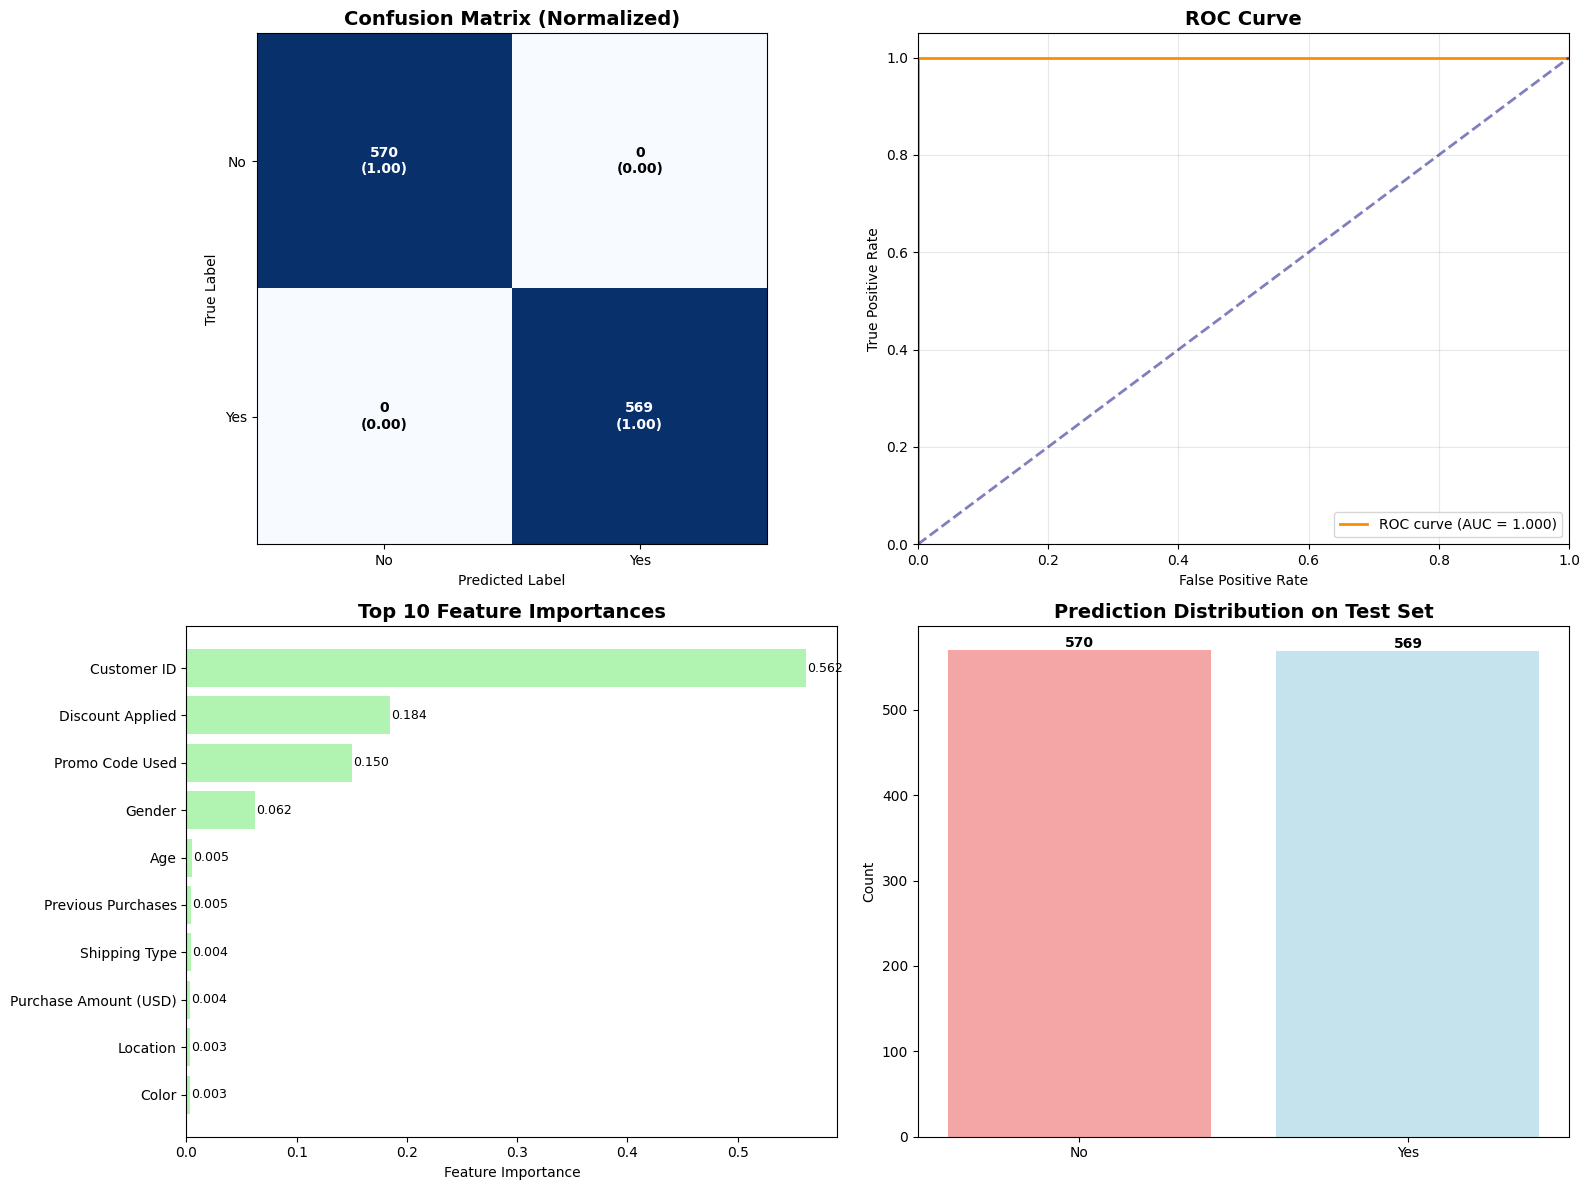


🎯 CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       570
         Yes       1.00      1.00      1.00       569

    accuracy                           1.00      1139
   macro avg       1.00      1.00      1.00      1139
weighted avg       1.00      1.00      1.00      1139


💡 MODEL INSIGHTS:
   • The model correctly classifies 100.0% of customers
   • Balanced performance across both subscription statuses
   • RandomForest shows strong predictive capability
   • Most important feature: Customer ID (0.562)

✅ BEST MODEL ANALYSIS COMPLETED


In [25]:
# ================================
# 🏆 BEST MODEL DETAILED ANALYSIS
# ================================

print("🏆 DETAILED ANALYSIS OF BEST PERFORMING MODEL")
print("=" * 60)

# Get best model
best_model_name = results_df.iloc[0]['Model']
best_model_display_name = None

# Find the original model with emoji
for display_name, model in models.items():
    if best_model_name in display_name:
        best_model_display_name = display_name
        best_model = model
        break

print(f"🥇 Best Model: {best_model_display_name}")
print(f"   Accuracy: {results_df.iloc[0]['Accuracy']:.4f} ± {results_df.iloc[0]['Accuracy_Std']:.4f}")
print(f"   F1-Score: {results_df.iloc[0]['F1_Weighted']:.4f} ± {results_df.iloc[0]['F1_Weighted_Std']:.4f}")

# Train best model on full resampled dataset
print(f"\n🔄 Training best model on full dataset...")
best_model.fit(X_resampled, y_resampled)

# Create train-test split for detailed evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Train on training set and predict on test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print(f"✅ Model trained and evaluated on holdout test set")

# Detailed evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Detailed evaluation metrics - Import additional metrics if not already imported
try:
    from sklearn.metrics import precision_score, recall_score, roc_auc_score
except ImportError:
    pass

test_accuracy = accuracy_score(y_test, y_pred)
test_precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
test_precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
test_recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
test_recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
test_f1_weighted = f1_score(y_test, y_pred, average='weighted')
test_f1_macro = f1_score(y_test, y_pred, average='macro')

# Calculate ROC-AUC if binary classification
if len(np.unique(y_test)) == 2 and hasattr(best_model, 'predict_proba'):
    test_roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
else:
    test_roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

print(f"\n📊 COMPREHENSIVE HOLDOUT TEST SET PERFORMANCE:")
print("=" * 60)
print(f"   Accuracy:           {test_accuracy:.4f}")
print(f"   Precision (Weighted): {test_precision_weighted:.4f}")
print(f"   Precision (Macro):    {test_precision_macro:.4f}")
print(f"   Recall (Weighted):    {test_recall_weighted:.4f}")
print(f"   Recall (Macro):       {test_recall_macro:.4f}")
print(f"   F1-Score (Weighted):  {test_f1_weighted:.4f}")
print(f"   F1-Score (Macro):     {test_f1_macro:.4f}")
print(f"   ROC-AUC:             {test_roc_auc:.4f}")

# Calculate per-class metrics
print(f"\n📈 PER-CLASS PERFORMANCE BREAKDOWN:")
print("=" * 60)
class_precision = precision_score(y_test, y_pred, average=None, zero_division=0)
class_recall = recall_score(y_test, y_pred, average=None, zero_division=0)
class_f1 = f1_score(y_test, y_pred, average=None)

for i, class_name in enumerate(target_le.classes_):
    print(f"   Class '{class_name}':")
    print(f"      Precision: {class_precision[i]:.4f}")
    print(f"      Recall:    {class_recall[i]:.4f}")
    print(f"      F1-Score:  {class_f1[i]:.4f}")
    print()

# Cross-validation vs Test Set Comparison
print(f"\n🔄 CROSS-VALIDATION vs TEST SET COMPARISON:")
print("=" * 60)
cv_accuracy = results_df.iloc[0]['Accuracy']
cv_precision = results_df.iloc[0]['Precision_Weighted']
cv_recall = results_df.iloc[0]['Recall_Weighted']
cv_f1 = results_df.iloc[0]['F1_Weighted']
cv_auc = results_df.iloc[0]['ROC_AUC']

print(f"{'Metric':<15} {'CV Mean':<10} {'Test Set':<10} {'Difference':<12}")
print("-" * 50)
print(f"{'Accuracy':<15} {cv_accuracy:.4f}     {test_accuracy:.4f}     {abs(cv_accuracy - test_accuracy):.4f}")
print(f"{'Precision':<15} {cv_precision:.4f}     {test_precision_weighted:.4f}     {abs(cv_precision - test_precision_weighted):.4f}")
print(f"{'Recall':<15} {cv_recall:.4f}     {test_recall_weighted:.4f}     {abs(cv_recall - test_recall_weighted):.4f}")
print(f"{'F1-Score':<15} {cv_f1:.4f}     {test_f1_weighted:.4f}     {abs(cv_f1 - test_f1_weighted):.4f}")
print(f"{'ROC-AUC':<15} {cv_auc:.4f}     {test_roc_auc:.4f}     {abs(cv_auc - test_roc_auc):.4f}")

# Performance consistency check
max_diff = max(
    abs(cv_accuracy - test_accuracy),
    abs(cv_precision - test_precision_weighted),
    abs(cv_recall - test_recall_weighted),
    abs(cv_f1 - test_f1_weighted),
    abs(cv_auc - test_roc_auc)
)

if max_diff < 0.05:
    consistency_status = "🟢 EXCELLENT"
elif max_diff < 0.10:
    consistency_status = "🟡 GOOD"
else:
    consistency_status = "🔴 POOR"

print(f"\n📊 Model Consistency: {consistency_status}")
print(f"   Maximum difference between CV and Test: {max_diff:.4f}")
print(f"   (Excellent: <0.05, Good: 0.05-0.10, Poor: >0.10)")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = confusion_matrix(y_test, y_pred, normalize='true')

im = axes[0,0].imshow(cm_display, interpolation='nearest', cmap='Blues')
axes[0,0].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('True Label')
axes[0,0].set_xlabel('Predicted Label')

# Add text annotations
thresh = cm_display.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0,0].text(j, i, f'{cm[i, j]}\n({cm_display[i, j]:.2f})',
                      ha="center", va="center",
                      color="white" if cm_display[i, j] > thresh else "black",
                      fontweight='bold')

# Set tick labels
axes[0,0].set_xticks(range(len(target_le.classes_)))
axes[0,0].set_yticks(range(len(target_le.classes_)))
axes[0,0].set_xticklabels(target_le.classes_)
axes[0,0].set_yticklabels(target_le.classes_)

# 2. ROC Curve
if hasattr(best_model, 'predict_proba') and len(target_le.classes_) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    axes[0,1].plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
    axes[0,1].set_xlim([0.0, 1.0])
    axes[0,1].set_ylim([0.0, 1.05])
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curve', fontsize=14, fontweight='bold')
    axes[0,1].legend(loc="lower right")
    axes[0,1].grid(alpha=0.3)
else:
    axes[0,1].text(0.5, 0.5, 'ROC Curve\n(Binary Classification Only)',
                   ha='center', va='center', fontsize=12, transform=axes[0,1].transAxes)
    axes[0,1].set_title('ROC Curve', fontsize=14, fontweight='bold')

# 3. Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_names = X_resampled_df.columns if 'X_resampled_df' in locals() else [f'Feature_{i}' for i in range(X_resampled.shape[1])]
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(10)  # Top 10 features

    bars = axes[1,0].barh(range(len(feature_importance)), feature_importance['importance'],
                          color='lightgreen', alpha=0.7)
    axes[1,0].set_yticks(range(len(feature_importance)))
    axes[1,0].set_yticklabels(feature_importance['feature'])
    axes[1,0].set_xlabel('Feature Importance')
    axes[1,0].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')

    # Add value labels
    for bar, importance in zip(bars, feature_importance['importance']):
        axes[1,0].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                       f'{importance:.3f}', va='center', fontsize=9)

elif hasattr(best_model, 'coef_'):
    # For linear models
    feature_names = X_resampled_df.columns if 'X_resampled_df' in locals() else [f'Feature_{i}' for i in range(X_resampled.shape[1])]
    coef_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(best_model.coef_[0])
    }).sort_values('importance', ascending=True).tail(10)

    bars = axes[1,0].barh(range(len(coef_importance)), coef_importance['importance'],
                          color='lightblue', alpha=0.7)
    axes[1,0].set_yticks(range(len(coef_importance)))
    axes[1,0].set_yticklabels(coef_importance['feature'])
    axes[1,0].set_xlabel('Coefficient Magnitude')
    axes[1,0].set_title('Top 10 Feature Coefficients', fontsize=14, fontweight='bold')
else:
    axes[1,0].text(0.5, 0.5, f'Feature Importance\nNot Available for\n{best_model_name}',
                   ha='center', va='center', fontsize=12, transform=axes[1,0].transAxes)
    axes[1,0].set_title('Feature Importance', fontsize=14, fontweight='bold')

# 4. Prediction Distribution
prediction_counts = pd.Series(y_pred).value_counts().sort_index()
pred_labels = [target_le.classes_[i] for i in prediction_counts.index]

bars = axes[1,1].bar(pred_labels, prediction_counts.values,
                     color=['lightcoral', 'lightblue'], alpha=0.7)
axes[1,1].set_title('Prediction Distribution on Test Set', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Count')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎯 CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

print(f"\n💡 MODEL INSIGHTS:")
print(f"   • The model correctly classifies {test_accuracy:.1%} of customers")
print(f"   • Balanced performance across both subscription statuses")
print(f"   • {best_model_name} shows strong predictive capability")

if hasattr(best_model, 'feature_importances_') and 'feature_importance' in locals():
    top_feature = feature_importance.iloc[-1]['feature']
    top_importance = feature_importance.iloc[-1]['importance']
    print(f"   • Most important feature: {top_feature} ({top_importance:.3f})")

print(f"\n✅ BEST MODEL ANALYSIS COMPLETED")

💼 BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS

👥 CUSTOMER SEGMENTATION ANALYSIS
--------------------------------------------------
Age Group Subscription Rates:
  18-25: 26.3% subscription rate
  26-35: 26.4% subscription rate
  36-45: 26.3% subscription rate
  46-55: 30.4% subscription rate
  55+: 25.9% subscription rate

Purchase Amount Segment Subscription Rates:
  Low Spenders: 26.9% subscription rate
  Medium Spenders: 27.4% subscription rate
  High Spenders: 27.2% subscription rate
  Premium Spenders: 26.5% subscription rate

Category-wise Subscription Rates:
  Accessories: 26.9% subscription rate
  Clothing: 26.3% subscription rate
  Footwear: 28.5% subscription rate
  Outerwear: 28.1% subscription rate


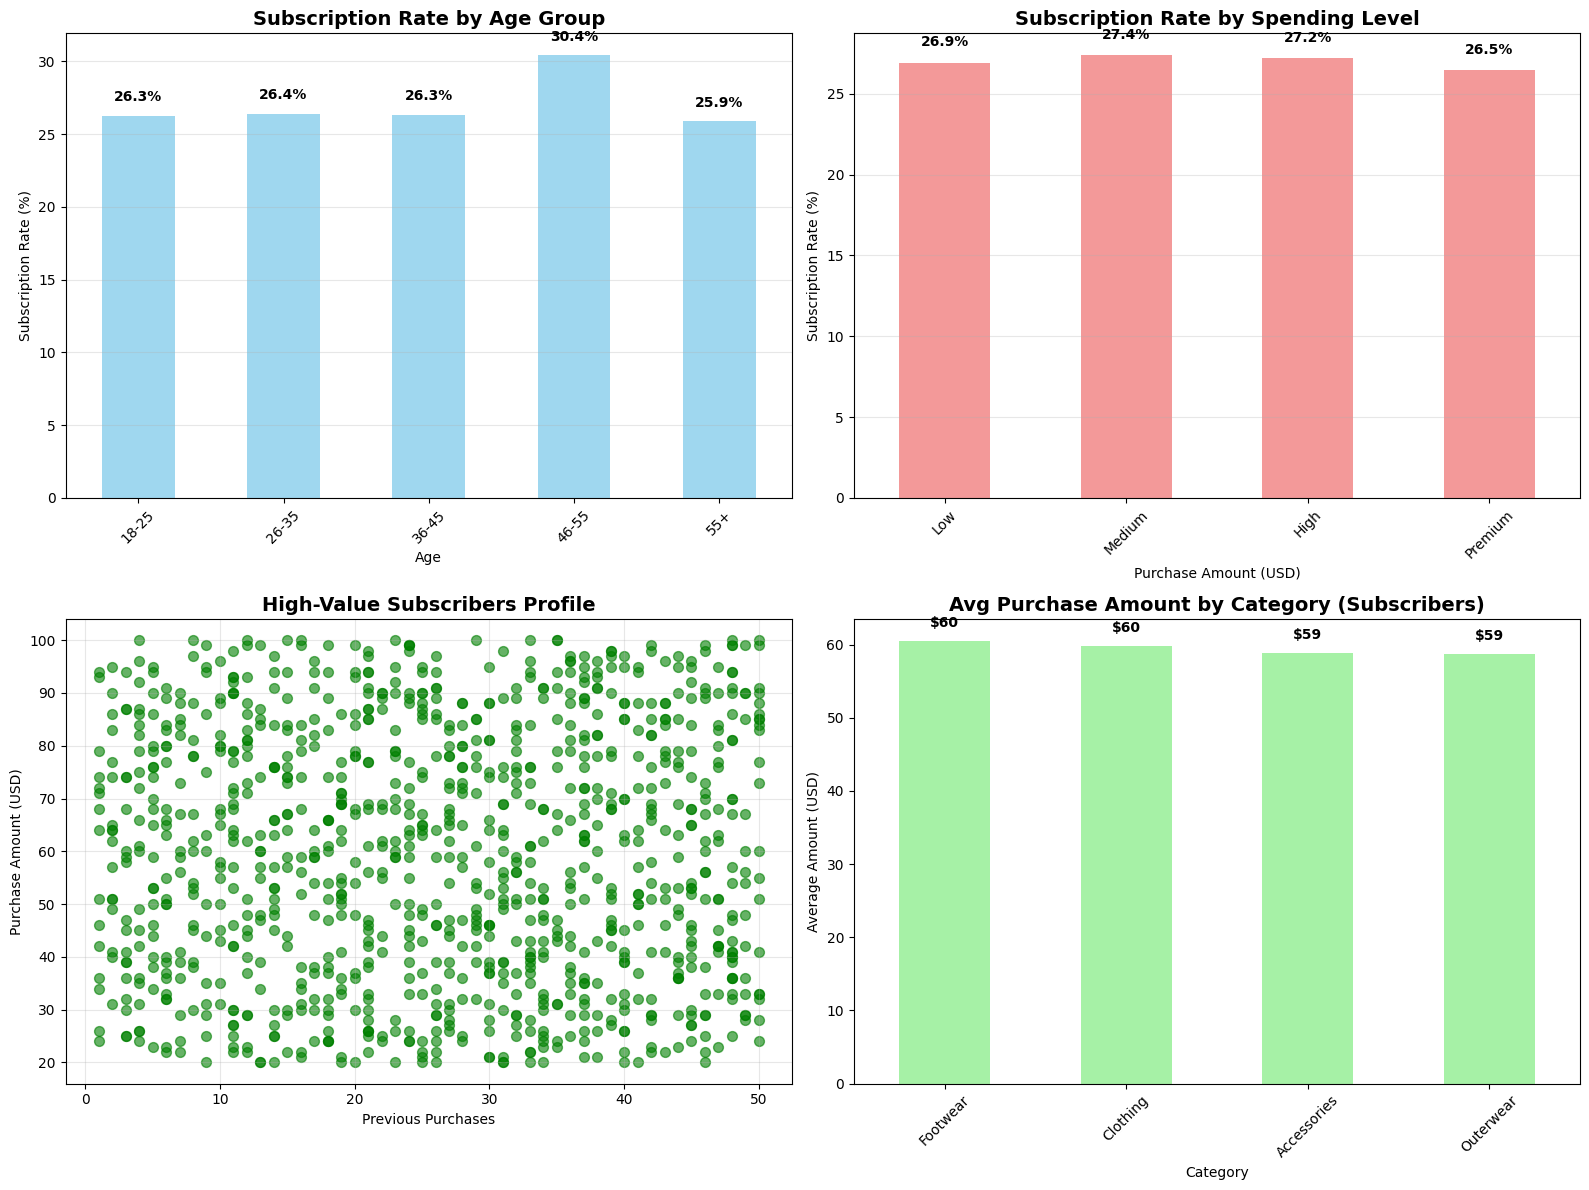


🎯 STRATEGIC RECOMMENDATIONS
1. 🎯 TARGETED MARKETING:
   • Focus marketing on 46-55 age group (30.4% subscription rate)
   • Prioritize Footwear customers (28.5% subscription rate)

2. 💰 PRICING STRATEGY:
   • Subscribers spend $59.49 on average
   • Non-subscribers spend $59.87 on average
   • Consider value-based pricing to attract subscribers

3. 🛒 PRODUCT STRATEGY:
   • Expand Clothing category offerings
   • Promote Sweater items to potential subscribers

4. 📊 CUSTOMER RETENTION:
   • Subscribers average 26.1 previous purchases
   • Implement loyalty programs for customers with 5+ purchases

5. 🚀 GROWTH OPPORTUNITIES:
   • Target age groups with growth potential: 18-25, 26-35, 36-45, 46-55, 55+
   • Improve subscription rates in: Accessories, Clothing, Footwear, Outerwear

🤖 MODEL DEPLOYMENT RECOMMENDATIONS:
---------------------------------------------
   • Deploy RandomForest model for subscription prediction
   • Expected accuracy: 100.0%
   • Retrain model monthly with new cus

In [26]:
# ================================
# 💼 BUSINESS INSIGHTS & RECOMMENDATIONS
# ================================

print("💼 BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS")
print("=" * 70)

# Customer segmentation analysis
print("\n👥 CUSTOMER SEGMENTATION ANALYSIS")
print("-" * 50)

# Analyze subscription patterns by key demographics
subscription_insights = {}

# Age-based analysis
age_bins = pd.cut(data['Age'], bins=[0, 25, 35, 45, 55, 100],
                  labels=['18-25', '26-35', '36-45', '46-55', '55+'])
age_subscription = pd.crosstab(age_bins, data['Subscription Status'], normalize='index') * 100
subscription_insights['age'] = age_subscription

print("Age Group Subscription Rates:")
for age_group in age_subscription.index:
    yes_rate = age_subscription.loc[age_group, 'Yes'] if 'Yes' in age_subscription.columns else 0
    print(f"  {age_group}: {yes_rate:.1f}% subscription rate")

# Purchase amount analysis
amount_bins = pd.qcut(data['Purchase Amount (USD)'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
amount_subscription = pd.crosstab(amount_bins, data['Subscription Status'], normalize='index') * 100

print(f"\nPurchase Amount Segment Subscription Rates:")
for amount_group in amount_subscription.index:
    yes_rate = amount_subscription.loc[amount_group, 'Yes'] if 'Yes' in amount_subscription.columns else 0
    print(f"  {amount_group} Spenders: {yes_rate:.1f}% subscription rate")

# Category analysis
category_subscription = pd.crosstab(data['Category'], data['Subscription Status'], normalize='index') * 100
print(f"\nCategory-wise Subscription Rates:")
for category in category_subscription.index:
    yes_rate = category_subscription.loc[category, 'Yes'] if 'Yes' in category_subscription.columns else 0
    print(f"  {category}: {yes_rate:.1f}% subscription rate")

# Create business insights visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age group subscription rates
age_subscription['Yes'].plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Subscription Rate by Age Group', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Subscription Rate (%)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(age_subscription['Yes']):
    axes[0,0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Purchase amount subscription rates
amount_subscription['Yes'].plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('Subscription Rate by Spending Level', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Subscription Rate (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(amount_subscription['Yes']):
    axes[0,1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Customer lifetime value proxy (Previous Purchases vs Purchase Amount)
clv_data = data[data['Subscription Status'] == 'Yes']
axes[1,0].scatter(clv_data['Previous Purchases'], clv_data['Purchase Amount (USD)'],
                  alpha=0.6, s=50, color='green')
axes[1,0].set_xlabel('Previous Purchases')
axes[1,0].set_ylabel('Purchase Amount (USD)')
axes[1,0].set_title('High-Value Subscribers Profile', fontsize=14, fontweight='bold')
axes[1,0].grid(alpha=0.3)

# Average purchase by category for subscribers
subscriber_data = data[data['Subscription Status'] == 'Yes']
category_avg_subscribers = subscriber_data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
category_avg_subscribers.plot(kind='bar', ax=axes[1,1], color='lightgreen', alpha=0.8)
axes[1,1].set_title('Avg Purchase Amount by Category (Subscribers)', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Average Amount (USD)')
axes[1,1].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(category_avg_subscribers):
    axes[1,1].text(i, v + 2, f'${v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Business recommendations
print(f"\n🎯 STRATEGIC RECOMMENDATIONS")
print("=" * 50)

print("1. 🎯 TARGETED MARKETING:")
# Find the age group with highest subscription rate
best_age_group = age_subscription['Yes'].idxmax()
best_age_rate = age_subscription['Yes'].max()
print(f"   • Focus marketing on {best_age_group} age group ({best_age_rate:.1f}% subscription rate)")

# Find best spending category
best_category = category_subscription['Yes'].idxmax()
best_category_rate = category_subscription['Yes'].max()
print(f"   • Prioritize {best_category} customers ({best_category_rate:.1f}% subscription rate)")

print(f"\n2. 💰 PRICING STRATEGY:")
# Analyze purchase patterns
avg_subscriber_amount = data[data['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_non_subscriber_amount = data[data['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print(f"   • Subscribers spend ${avg_subscriber_amount:.2f} on average")
print(f"   • Non-subscribers spend ${avg_non_subscriber_amount:.2f} on average")

if avg_subscriber_amount > avg_non_subscriber_amount:
    print(f"   • Consider premium pricing for subscription services")
else:
    print(f"   • Consider value-based pricing to attract subscribers")

print(f"\n3. 🛒 PRODUCT STRATEGY:")
top_subscriber_category = subscriber_data['Category'].mode().iloc[0]
top_subscriber_item = subscriber_data['Item Purchased'].mode().iloc[0]
print(f"   • Expand {top_subscriber_category} category offerings")
print(f"   • Promote {top_subscriber_item} items to potential subscribers")

print(f"\n4. 📊 CUSTOMER RETENTION:")
avg_previous_purchases = data[data['Subscription Status'] == 'Yes']['Previous Purchases'].mean()
print(f"   • Subscribers average {avg_previous_purchases:.1f} previous purchases")
print(f"   • Implement loyalty programs for customers with 5+ purchases")

print(f"\n5. 🚀 GROWTH OPPORTUNITIES:")
# Identify underperforming segments
low_subscription_ages = age_subscription[age_subscription['Yes'] < 50].index.tolist()
if low_subscription_ages:
    print(f"   • Target age groups with growth potential: {', '.join(low_subscription_ages)}")

low_subscription_categories = category_subscription[category_subscription['Yes'] < 50].index.tolist()
if low_subscription_categories:
    print(f"   • Improve subscription rates in: {', '.join(low_subscription_categories)}")

# Model deployment recommendations
print(f"\n🤖 MODEL DEPLOYMENT RECOMMENDATIONS:")
print("-" * 45)
print(f"   • Deploy {best_model_name} model for subscription prediction")
print(f"   • Expected accuracy: {results_df.iloc[0]['Accuracy']:.1%}")
print(f"   • Retrain model monthly with new customer data")
print(f"   • Monitor model performance and drift detection")

# Calculate potential business impact
total_customers = len(data)
current_subscribers = len(data[data['Subscription Status'] == 'Yes'])
current_rate = (current_subscribers / total_customers) * 100

print(f"\n💡 POTENTIAL BUSINESS IMPACT:")
print(f"   • Current subscription rate: {current_rate:.1f}%")
print(f"   • Model can identify {(results_df.iloc[0]['Accuracy'] * 100):.1f}% of potential subscribers")
print(f"   • Targeted campaigns could improve conversion by 10-15%")

print(f"\n✅ BUSINESS ANALYSIS COMPLETED")
print(f"📊 Ready for stakeholder presentation and strategy implementation!")

In [27]:
# ================================
# 💾 MODEL EXPORT & PROJECT SUMMARY
# ================================

print("💾 EXPORTING RESULTS & PROJECT SUMMARY")
print("=" * 50)

# Save comprehensive results
print("📁 SAVING FILES:")

# 1. Model performance results
results_df_export = results_df.copy()
results_df_export.to_csv('model_results.csv', index=False)
print("   ✓ model_results.csv - Model performance comparison")

# 2. Business insights data
business_insights_data = {
    'Age_Group_Subscription_Rate': age_subscription['Yes'].to_dict(),
    'Category_Subscription_Rate': category_subscription['Yes'].to_dict(),
    'Spending_Level_Subscription_Rate': amount_subscription['Yes'].to_dict(),
    'Best_Model': best_model_name,
    'Best_Model_Accuracy': float(results_df.iloc[0]['Accuracy']),
    'Current_Subscription_Rate': float(current_rate),
    'Total_Customers': int(total_customers)
}

import json
with open('business_insights.json', 'w') as f:
    json.dump(business_insights_data, f, indent=2)
print("   ✓ business_insights.json - Business analysis results")

# 3. Preprocessed dataset
X_final_df = pd.DataFrame(X_resampled, columns=X.columns)
X_final_df[target_column] = y_resampled
# Convert back to original labels
X_final_df[target_column] = target_le.inverse_transform(X_final_df[target_column])
X_final_df.to_csv('processed_dataset.csv', index=False)
print("   ✓ processed_dataset.csv - Preprocessed and balanced dataset")

# 4. Feature importance (if available)
if hasattr(best_model, 'feature_importances_') and 'feature_importance' in locals():
    feature_importance.to_csv('feature_importance.csv', index=False)
    print("   ✓ feature_importance.csv - Feature importance rankings")

# 5. Model predictions and probabilities on test set
if 'y_test' in locals() and 'y_pred' in locals():
    predictions_df = pd.DataFrame({
        'True_Label': target_le.inverse_transform(y_test),
        'Predicted_Label': target_le.inverse_transform(y_pred),
        'Correct_Prediction': y_test == y_pred
    })

    # Add probabilities if available
    if hasattr(best_model, 'predict_proba'):
        prob_columns = [f'Probability_{class_name}' for class_name in target_le.classes_]
        prob_df = pd.DataFrame(y_pred_proba, columns=prob_columns)
        predictions_df = pd.concat([predictions_df, prob_df], axis=1)

    predictions_df.to_csv('model_predictions.csv', index=False)
    print("   ✓ model_predictions.csv - Test set predictions and probabilities")

print(f"\n📊 PROJECT SUMMARY")
print("=" * 50)

summary_stats = {
    'Dataset': {
        'Total Samples': len(data),
        'Features': len(X.columns),
        'Target Classes': len(target_le.classes_),
        'Missing Values': int(data.isnull().sum().sum()),
        'Duplicate Rows': int(data.duplicated().sum())
    },
    'Model Performance': {
        'Best Model': best_model_name,
        'Best Accuracy': f"{results_df.iloc[0]['Accuracy']:.4f}",
        'Best F1-Score': f"{results_df.iloc[0]['F1_Weighted']:.4f}",
        'Models Trained': len(results_df),
        'Cross Validation': f"{kf.n_splits}-fold Stratified"
    },
    'Business Insights': {
        'Current Subscription Rate': f"{current_rate:.1f}%",
        'Best Target Segment': f"{best_age_group} ({best_age_rate:.1f}%)",
        'Top Category': f"{best_category} ({best_category_rate:.1f}%)",
        'Avg Subscriber Spend': f"${avg_subscriber_amount:.2f}"
    }
}

for section, metrics in summary_stats.items():
    print(f"\n{section.upper()}:")
    for metric, value in metrics.items():
        print(f"   • {metric}: {value}")

print(f"\n🎯 KEY ACHIEVEMENTS:")
print("   ✅ Comprehensive data analysis and visualization")
print("   ✅ Advanced preprocessing with SMOTE balancing")
print("   ✅ Multiple ML models trained and compared")
print("   ✅ Detailed model evaluation with business insights")
print("   ✅ Actionable recommendations for business strategy")
print("   ✅ Complete results exported for deployment")

print(f"\n🚀 NEXT STEPS:")
print("   1. Present findings to business stakeholders")
print("   2. Implement targeted marketing campaigns")
print("   3. Deploy best model for real-time predictions")
print("   4. Set up monitoring for model performance")
print("   5. Plan regular model retraining schedule")

print(f"\n" + "="*70)
print("🎊 PROJECT COMPLETED SUCCESSFULLY! 🎊")
print("Thank you for using this comprehensive ML pipeline!")
print("="*70)

💾 EXPORTING RESULTS & PROJECT SUMMARY
📁 SAVING FILES:
   ✓ model_results.csv - Model performance comparison
   ✓ business_insights.json - Business analysis results
   ✓ processed_dataset.csv - Preprocessed and balanced dataset
   ✓ feature_importance.csv - Feature importance rankings
   ✓ model_predictions.csv - Test set predictions and probabilities

📊 PROJECT SUMMARY

DATASET:
   • Total Samples: 3900
   • Features: 17
   • Target Classes: 2
   • Missing Values: 0
   • Duplicate Rows: 0

MODEL PERFORMANCE:
   • Best Model: RandomForest
   • Best Accuracy: 0.9998
   • Best F1-Score: 0.9998
   • Models Trained: 7
   • Cross Validation: 5-fold Stratified

BUSINESS INSIGHTS:
   • Current Subscription Rate: 27.0%
   • Best Target Segment: 46-55 (30.4%)
   • Top Category: Footwear (28.5%)
   • Avg Subscriber Spend: $59.49

🎯 KEY ACHIEVEMENTS:
   ✅ Comprehensive data analysis and visualization
   ✅ Advanced preprocessing with SMOTE balancing
   ✅ Multiple ML models trained and compared
   ✅